In [1]:
import matplotlib as mpl
from numpy.random import randint

import traceback
from matplotlib.pyplot import *
import matplotlib
import os
import bregnn.io as io
#import bregnn.utils as utils
import sys
import json
from optparse import OptionParser, make_option
sys.path.insert(0, '/users/nchernya/HHbbgg_ETH/bregression/python/')
import datetime
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import probfit
import iminuit
from scipy.stats import norm

from probfit import UnbinnedLH,Normalized,BinnedLH,crystalball
from probfit import gaussian
from iminuit import Minuit


### RUN THIS FOR COMPARISION MSE HUBERLOSS AND HUBER

In [10]:
def plot_response(input_dir,names,out_dir):
   
        matplotlib.rcParams['figure.figsize'] = [10, 10]
        fig,ax=plt.subplots()
        fig1,ax1=plt.subplots()
        cycol = cycle('bgrcmk')
        counter=0
        for i in range(0,len(names)):
        
            delta=names[i].split("_")[1]
            
            if names[i].find("EE")>-1:
                tag='EE'
            if names[i].find("EB")>-1:
                tag='EB'
            if names[i].find("OneTail")>-1:
              
                end="HuberLossOneTail"

            elif names[i].find("mse")>-1:
                
                end="mse"
                delta=""
                
            elif names[i].find("HuberLoss_")>-1:
                #continue
                
                end='HuberLoss'
                  

            inp_dir=input_dir
            inp_file=names[i]

            data = io.read_data('%s%s'%(inp_dir,inp_file),columns=None)




            print("data read: ",end)
            y = (data['genPt']/data['pt']).values.reshape(-1,1)
            X_pt = (data['pt']).values.reshape(-1,1)
            X_eta = (data['scEta']).values.reshape(-1,1)
            response = (data['scRawEnergy']*data['response']).values.reshape(-1,1)
            response_NN = (data['scRawEnergy']*data['response_NN_'+end]).values.reshape(-1,1)
            gen_energy = (data['genEnergy']).values.reshape(-1,1)
            raw_energy = (data['scRawEnergy']).values.reshape(-1,1)
            raw=(data['scRawEnergy']/data['genEnergy']).values.reshape(-1,1)
            ax.hist(response_NN,bins=100,label=end,range=(0,5000),density=True,histtype=u'step')
            if counter==0:
                ax1.hist(raw,bins=1000,label='raw',range=(0.8,1.2),histtype=u'step',density=True)
                counter+=1


            ax1.hist(gen_energy/response_NN,bins=1000,range=(0.8,1.2),density=True,
                     log=False,label=end,histtype=u'step');



        ax.legend(loc='upper right');
        ax1.legend(loc='upper right')
        ax.set_title("Normalized Histogramm of scRawEnergy*response  Huber {}".format(tag))
        ax.set_ylabel("%")
        ax.set_xlabel("scRawEnergy*response")
        ax1.set_ylabel("%")
        ax1.set_xlabel("response")
        ax1.set_title("Normalized Histogram of gen_energy/response Huber {}".format(tag))

        fig.savefig("{}/{}_Comparision_Huber_mse_HuberLoss_energies_{}.png".format(out_dir,tag,end))
        fig1.savefig("{}/{}_Comparision_{}".format(out_dir,tag,end))
        fig1.show()
        fig.show()

['HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5', 'mse_EB_1_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5']
('data read: ', 'HuberLossOneTail')
('data read: ', 'mse')
('data read: ', 'HuberLoss')


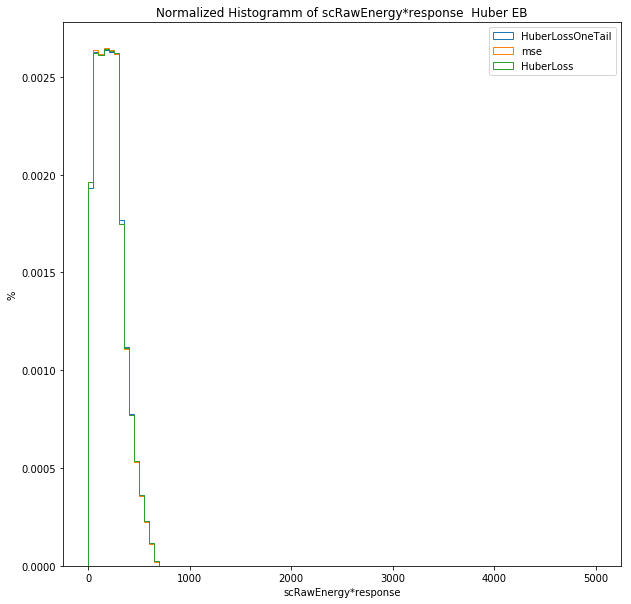

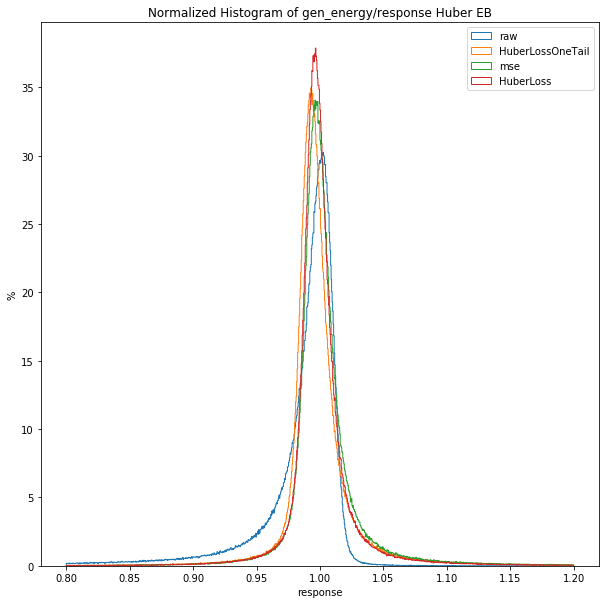

In [12]:
import os

from IPython.core.interactiveshell import InteractiveShell
from probfit.pdf import doublecrystalball,doublegaussian
from probfit.plotting import draw_normed_pdf
from itertools import cycle
InteractiveShell.ast_node_interactivity = "last_expr"
input_dir=[]
names=[]
parent_dir="/work/kaechb/applied_EB/"
for dire in os.listdir(parent_dir):
      
        for file in os.listdir(parent_dir+dire):#+"/"+dire
        #for file in os.listdir(sys.argv[1]):
            if file.find('.hd')!=-1 and file.find('applied')!=-1 and dire.find('1')!=-1:
               # input_dir.append(parent_dir)#+dire+"/"][0]
                
                names.append(dire+"/"+file)
print(names)
plot_response(parent_dir,names,"/work/kaechb/plots/")


### RUN THIS FOR COMPARISION DIFFERENT DELTAS

In [13]:
def plot_response(input_dir,names,out_dir,onlyone):
   
        matplotlib.rcParams['figure.figsize'] = [10, 10]
        fig,ax=plt.subplots()
        fig1,ax1=plt.subplots()
        cycol = cycle('bgrcmk')
        counter=0
        for i in range(0,len(names)):
        
            delta=names[i].split("_")[1]
            
            if names[i].find("EE")>-1:
                tag='EE'
            if names[i].find("EB")>-1:
                tag='EB'
            if names[i].find("OneTail")>-1:
                if onlyone=="Huber":
                    continue
                end="HuberLossOneTail"

            elif names[i].find("mse")>-1:
                
                end="mse"
                delta=""
                
            elif names[i].find("HuberLoss_")>-1:
                #continue
                if onlyone=="OneTail":
                    continue
                
                end='HuberLoss'
                  

            inp_dir=input_dir
            inp_file=names[i]

            data = io.read_data('%s%s'%(inp_dir,inp_file),columns=None)




            print("data read: ",end)
            y = (data['genPt']/data['pt']).values.reshape(-1,1)
            X_pt = (data['pt']).values.reshape(-1,1)
            X_eta = (data['scEta']).values.reshape(-1,1)
            response = (data['scRawEnergy']*data['response']).values.reshape(-1,1)
            response_NN = (data['scRawEnergy']*data['response_NN_'+end]).values.reshape(-1,1)
            gen_energy = (data['genEnergy']).values.reshape(-1,1)
            raw_energy = (data['scRawEnergy']).values.reshape(-1,1)
            raw=(data['scRawEnergy']/data['genEnergy']).values.reshape(-1,1)
            ax.hist(response_NN,bins=100,label=end+delta,range=(0,5000),density=True,histtype=u'step')
            if counter==0:
                ax1.hist(raw,bins=1000,label='raw',range=(0.8,1.2),histtype=u'step',density=True)
                counter+=1


            ax1.hist(gen_energy/response_NN,bins=1000,range=(0.8,1.2),density=True,
                     log=False,label=end+delta,histtype=u'step');



        ax.legend(loc='upper right');
        ax1.legend(loc='upper right')
        ax.set_title("Normalized Histogramm of scRawEnergy*response  Huber {}".format(tag))
        ax.set_ylabel("%")
        ax.set_xlabel("scRawEnergy*response")
        ax1.set_ylabel("%")
        ax1.set_xlabel("response")
        ax1.set_title("Normalized Histogram of gen_energy/response Huber {}".format(tag))

        fig.savefig("{}/{}Comparision_Energies_Delta{}.png".format(out_dir,tag,end))
        fig1.savefig("{}/{}_Comparision_Delta_{}".format(out_dir,tag,end))
        fig1.show()
        fig.show()

['HuberLoss_1_EE_applied/applied_res_2019-05-02_EE.hd5', 'HuberLossOneTail_1_EE_applied/applied_res_2019-05-02_EE.hd5', 'HuberLoss_5_EE_applied/applied_res_2019-05-02_EE.hd5', 'HuberLoss_2_EE_applied/applied_res_2019-05-02_EE.hd5', 'HuberLossOneTail_2_EE_applied/applied_res_2019-05-02_EE.hd5', 'HuberLossOneTail_5_EE_applied/applied_res_2019-05-02_EE.hd5']
('data read: ', 'HuberLoss')
('data read: ', 'HuberLoss')
('data read: ', 'HuberLoss')


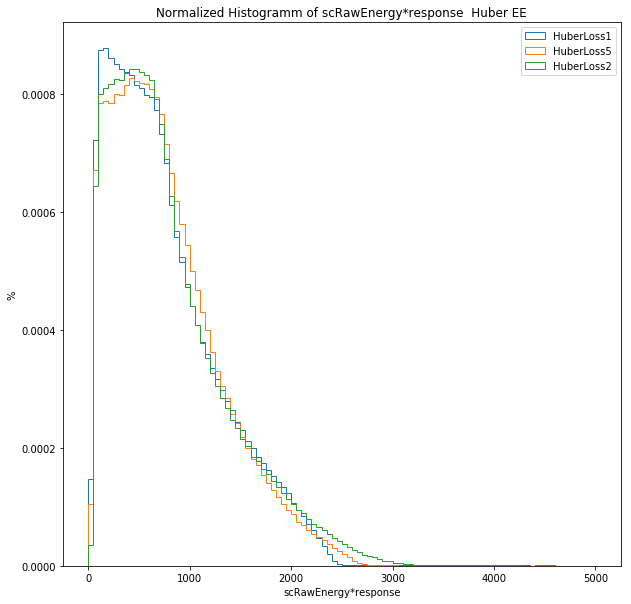

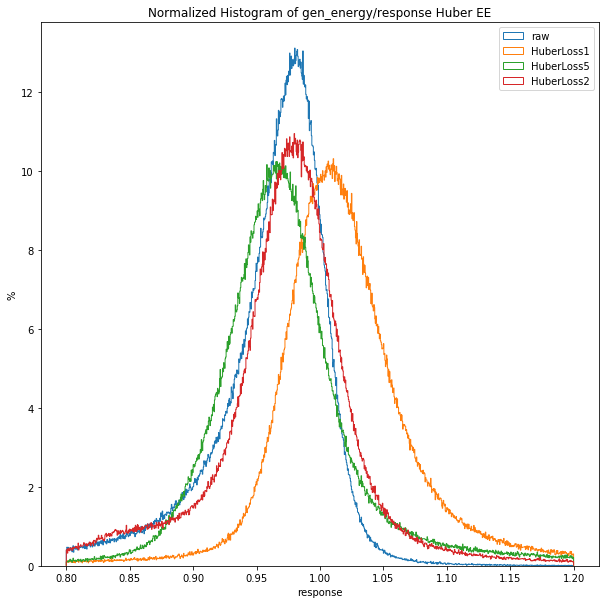

In [14]:
import os

from IPython.core.interactiveshell import InteractiveShell
from probfit.pdf import doublecrystalball,doublegaussian
from probfit.plotting import draw_normed_pdf
from itertools import cycle
InteractiveShell.ast_node_interactivity = "last_expr"
input_dir=[]
names=[]
parent_dir="/work/kaechb/applied_EE/"
for dire in os.listdir(parent_dir):
      
        for file in os.listdir(parent_dir+dire):#+"/"+dire
        #for file in os.listdir(sys.argv[1]):
            if file.find('.hd')!=-1 and file.find('applied')!=-1 and dire.find('mse')==-1:
               # input_dir.append(parent_dir)#+dire+"/"][0]
                
                names.append(dire+"/"+file)
print(names)
plot_response(parent_dir,names,"/work/kaechb/plots/",onlyone="Huber")


### FOR PROFILE PLOTS

In [ ]:
parent_dir="/work/kaechb/applied_EB/"
names=[]
for dire in os.listdir(parent_dir):
      
    #if  os.path.isdir("/work/kaechb/"+dire):
        for file in os.listdir(parent_dir+dire):#+"/"+dire
        #for file in os.listdir(sys.argv[1]):
            if file.find('.hd')!=-1 and file.find('applied')!=-1 :
               # input_dir.append(parent_dir)#+dire+"/"][0]
                
                names.append(dire+"/"+file)
print(names)
matplotlib.rcParams['figure.figsize'] = [10, 10]
inp_dir=parent_dir
bins_gaussian_amount=100
bins_double_gaussian_amount=20
amountbins_column=15
debug_fit=0
debug_fit_gauss=0
amountbins=15

for column in ['pt']:#
    if column=='pt':
        xlab="$p_T$"
    if column=='rhoValue':
        xlab="$\\rho$"
    if column=='scEta':
        xlab="$\eta$"
    profile_x=[]
    profile_y=[]
    profile_ef=[]
    profile_down=[]
    profile_up=[]
    profile_sigma_l=[]
    profile_sigma_l_err=[]

    for k in range(0,len(names)):#len(names)
        if names[k].find("EE")>-1:
            tag="EE"
        if names[k].find("EB")>-1:
            tag="EB"

        if names[k].find("OneTail")>-1:
                end="HuberLossOneTail"
                delta=names[k].split("_")[1]

        elif names[k].find("Huber")>-1:
                end="HuberLoss"
                delta=names[k].split("_")[1]
        elif names[k].find("mse")>-1:
                end="mse"
                delta=""
        plot_out_dir="/work/kaechb/"+end+"_"+delta+"/" 

        if not os.path.exists(plot_out_dir):
            os.makedirs(plot_out_dir)
        inp_file=names[k]
        original_df=io.read_data('%s%s'%(inp_dir,inp_file),columns=None)
        print('%s%s'%(inp_dir,inp_file))
        print(end)

        lower_bound=0.5
        upper_bound=1.5

        y_plot=np.zeros(amountbins)
        x_plot=np.zeros(amountbins)
        y_err_fit=np.zeros(amountbins)
        sigma_l=np.zeros(amountbins)
        sigma_l_err=np.zeros(amountbins)
        y_err_L_sigma=np.zeros(amountbins)
        y_err_R_sigma=np.zeros(amountbins)
        df=original_df.copy()


        df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values)
        df=df[df['response']>lower_bound]
        df=df[df['response']<upper_bound]

        df.loc[:,'response_NN_'+end]=np.reciprocal(df.loc[:,'response_NN_'+end].values)
        df=df[df['response_NN_'+end]>lower_bound]
        df=df[df['response_NN_'+end]<upper_bound]
        df=df[df['pt']>0]
        df=df[df['pt']<300]
#        df.loc[:,column[:2]]=df[abs(df[column[:2]]-df[column[:2]].mean())<3*df[column[:2]].std()][column[:2]] #outlier fuck up binning otherwise
        notused,bins=pd.qcut(df[column],amountbins_column, retbins=True)   
        for i in range(0,len(bins)-1):
            if i!=10:
                continue
            else:
                 
                df_temp=df[df[column] >=bins[i]]
                df_temp=df_temp[df_temp[column]<=bins[i+1]]
                data=df_temp.loc[:,'response_NN_'+end].astype(float).values
                plt.hist(data)
                plt.show
            try:
                ##selecting data in bin
                 
                n,bins_gauss,patches=plt.hist(data,bins=bins_first,density=True)
            
                plt.close()
                data=data[data>bins_gauss[np.max([0,np.argmax(n)-30])]]
                data=data[data<bins_gauss[np.min([len(n)-1,np.argmax(n)+30])]]
                n_max=np.argmax(n)
                print("max n:{} at {}".format(np.max(n),bins_gauss[n_max]))
                bound_gauss=[bins_gauss[np.argmax(n)]-.005,bins_gauss[np.argmax(n)]+.005]
                bound_double_gauss=bound_gauss
                normalized_gaussian = probfit.Normalized(probfit.gaussian, bound_gauss)
                normalized_doublegaussian = probfit.Normalized(probfit.pdf.doublegaussian, bound_double_gauss)
                binned_likelihood_gauss = probfit.BinnedLH(normalized_gaussian, data, 
                                         bins=bins_gaussian_amount, bound=bound_gauss)
                pars_gauss = dict(mean  = bins_gauss[np.argmax(n)],
                                  sigma = np.std(data),
                                  fix_mean=True
                                   )
                minuit = iminuit.Minuit(binned_likelihood_gauss,print_level=debug_fit_gauss,pedantic=0, **pars_gauss)
                minuit.migrad()  
                
                
                binned_likelihood_gauss.draw(minuit,nfbins=bins_first)
                
                plt.close()
        
                pars_dg = dict(mean  = minuit.values[0],
                               
                               sigma_L =  np.std(data),     
                               sigma_R = np.std(data),
                               error_sigma_L=.0001,
                               error_sigma_R=.0001,
                               
                               fix_mean=True
                               )

                binned_likelihood_dg   = probfit.BinnedLH(normalized_doublegaussian, data,
                                bins=bins_double_gaussian_amount, bound=bound_double_gauss)
               
                minuit = iminuit.Minuit(binned_likelihood_dg,print_level=debug_fit,pedantic=0, **pars_dg)
                minuit.migrad() 
                binned_likelihood_dg.draw(minuit)
                plt.close()
                
                pars_dg = dict(mean  = minuit.values[0],
                               
                               sigma_L =  minuit.values[1],     
                               sigma_R = minuit.values[2],  
                               error_sigma_L=.0001,
                               error_sigma_R=.0001,
                               
                               )

                binned_likelihood_dg   = probfit.BinnedLH(normalized_doublegaussian, data,
                                bins=bins_double_gaussian_amount, bound=bound_double_gauss)
               
                minuit = iminuit.Minuit(binned_likelihood_dg,print_level=debug_fit,pedantic=0, **pars_dg)
                minuit.migrad() 

                coeff=minuit.args
                display(coeff)

                ax=plt.subplot2grid((6,3),(0,0), rowspan=4,colspan=4)   
                (data_edges, datay), (errorp, errorm), (total_pdf_x, total_pdf_y),parts = \
                binned_likelihood_dg.draw(minuit,parmloc=((0.1,0.95)),nfbins=10*bins_double_gaussian_amount)

                plt.title("{}: {} {} Double Gaussian $response$ for {} in {} to {}".format(tag,end,delta,xlab,int(10*bins[i])/10.,int(10*bins[i+1])/10.))
                data_edges=(data_edges[1:]+data_edges[:-1])/2
                fit_y=np.zeros(len(datay))
                x_plot[i]=df_temp[column].values[np.argmin(df_temp['response'].values-coeff[0])]
                y_plot[i]=coeff[0]
                y_err_fit[i]+=minuit.errors[0]
                y_err_L_sigma[i]+=coeff[1]
                sigma_l_err[i]+=(minuit.errors[1]+minuit.errors[2])/2.
                
                if sigma_l_err[i]>.05:
                    sigma_l_err[i]=0
                print(sigma_l_err)
                sigma_l[i]+=coeff[1]
                y_err_R_sigma[i]+=coeff[2]
                for kill in range(0,len(datay)):
                    fit_y[kill]=total_pdf_y[np.argmin(abs(total_pdf_x - data_edges[kill]))]
                ratio=datay/fit_y
                plt.subplot2grid((5,3),(4,0),rowspan=2,colspan=4).set_yticks([0.8,1])
                plt.plot(data_edges,ratio,'bo')


                plt.ylabel(r"$ratio$")
                plt.xlabel("response")
                plt.ylim([0.8,1.2])
                plt.savefig(plot_out_dir+"/{}_{}_{}_{}_{}".format(tag,column,i,end,delta)) 

                plt.show()
                
                

            except Exception as e:
                print(traceback.print_exc())
                print ("erroor")
        profile_x.append(x_plot)
        profile_y.append(y_plot)
        profile_ef.append(y_err_fit)
        profile_down.append(y_err_L_sigma)
        profile_up.append(y_err_R_sigma)
        profile_sigma_l.append(sigma_l)
        profile_sigma_l_err.append(sigma_l_err)


    fig,ax=plt.subplots()
    ax.set_ylim([0.975,1.05])
    ax.set_title("{}: Profile $response$ vs {}, Fit error".format(tag,xlab))
    ax.set_ylabel(r"$response$")
    ax.set_xlabel(r"{}".format(xlab))
    for index in range(0,len(names)):

            if names[index].find("OneTail")>-1:

                    end="HuberLossOneTail"
                    delta=names[index].split("_")[1]
                    end=end+delta

            elif names[index].find("Huber")>-1:
                    end="HuberLoss"
                    delta=names[index].split("_")[1]
                    end=end+delta
            elif names[index].find("mse")>-1:
                end="mse"
                delta=names[index].split("_")[2]
                end=end+delta
            ax.errorbar(profile_x[index],profile_y[index],yerr=profile_ef[index],fmt='.',label=end)  
    ax.legend()
    fig.savefig(plot_out_dir+"{}_Fit_Error_response_vs_{}".format(tag,column))
    plt.show()
    fig,ax=plt.subplots()
    
    ax.set_title("Profile $\sigma_L$ vs {}".format(xlab))
    ax.set_ylabel(r"$\sigma_l$")
    #ax.set_ylim([0.0,.5])
    
    ax.set_xlabel(r"{}".format(xlab))
    for index in range(0,len(names)):
        print(names[index])
        
        if names[index].find("OneTail")>-1:

                end="HuberLossOneTail"
                delta=names[index].split("_")[1]
                end=end+delta

        elif names[index].find("Huber")>-1:
                end="HuberLoss"
                delta=names[index].split("_")[1]
                end=end+delta
        elif names[index].find("mse")>-1:
                end="mse"
                delta=names[index].split("_")[2]
                end=end
        ax.errorbar(profile_x[index],profile_sigma_l[index],yerr=list(profile_sigma_l_err[index]),fmt='.',label=end)  
    ax.legend()
    fig.savefig(plot_out_dir+"{}_Sigma_L_response_vs_{}".format(tag,column))
    plt.show()






In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def plot_mauro(data)
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)

bins = np.linspace(.9,1.05, 21)

dfmc=data

for y in ["pt"]:
    
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)

    dfmc['binetavar'] = pd.cut(dfmc["response"], bins)
    bpmc = dfmc.boxplot(column=y,by='binetavar', return_type='dict', ax=ax)
    [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    dfdata['binetavar'] = pd.cut(dfdata["ScEta"], bins)
    bpdata = dfdata.boxplot(column=y,by='binetavar', return_type='dict', ax=ax)
    [[item.set_color('r') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    plt.savefig('datamc_'+y+'_eta.png')

    
    ###
    ycorr = y+'_corr'
    print "Plotting ", y
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)

    dfmc['binetavar'] = pd.cut(dfmc["ScEta"], bins)
    bpmccorr = dfmc.boxplot(column=ycorr,by='binetavar', return_type='dict', ax=ax)
    [[item.set_color('b') for item in bpmccorr[key]['medians']] for key in bpmccorr.keys()]
    [[item.set_color('b') for item in bpmccorr[key]['boxes']] for key in bpmccorr.keys()]
    [[item.set_color('b') for item in bpmccorr[key]['whiskers']] for key in bpmccorr.keys()]
    [[item.set_color('b') for item in bpmccorr[key]['caps']] for key in bpmccorr.keys()]
    dfdata['binetavar'] = pd.cut(dfdata["ScEta"], bins)
    bpdata = dfdata.boxplot(column=y,by='binetavar', return_type='dict', ax=ax)

SyntaxError: invalid syntax (<ipython-input-5-b241f16ece0e>, line 3)

['HuberLossOneTail_2_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLossOneTail_5_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_5_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_2_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5', 'mse_EB_1_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5']
/work/kaechb/applied_EB/HuberLossOneTail_2_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[1.0097537  1.00978339 1.0085268  1.0086813  1.0090636  1.01023269
 1.01018167 1.00811779 1.01009941 1.01092517 1.01268458 1.00870275
 1.01098633 1.0121696  1.01102078 1.01139975 1.0095681  1.00946558
 1.00834918 1.01076496 1.01119304 1.00930488 1.00966454 1.00890088
 1.01031137 1.00959373 1.00836504 1.00897634 1.00977993 1.01003659
 1.01078224 1.01116633 1.00851524 1.00808549 1.00925899 1.01063526
 1.00969088 1.01006556 1.01196742 1.01054239 1.00807881 1.00901389
 1.01043046 1.00800395

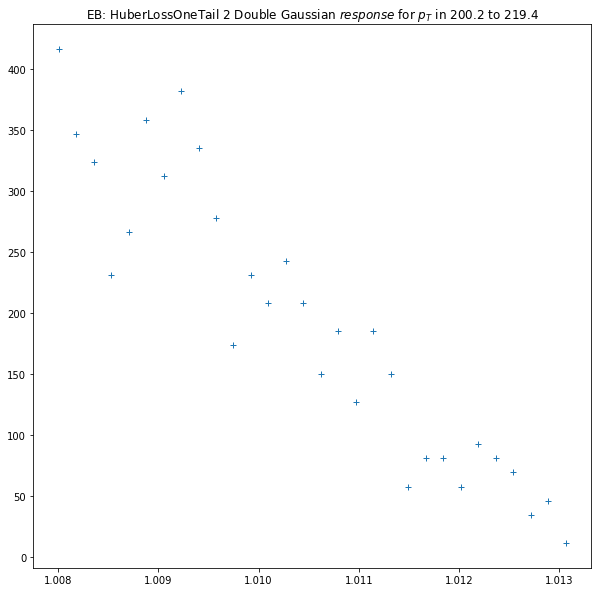

max n:416.655302082 at 1.00800395012
[1.00802648 1.00864434 1.01235354 1.00968111 1.01208997 1.011531
 1.0094192  1.00876963 1.0086695  1.00837386 1.01023102 1.01022828
 1.00907457 1.00934124 1.00907183 1.01134014 1.00930548 1.01239836
 1.01027882 1.00805235 1.00975502 1.00961518 1.00961232 1.01143432
 1.00874114 1.00977504 1.00903797 1.01106989 1.00825489 1.01015687
 1.00903487 1.00933003 1.00894952 1.00825036 1.00989866 1.00897515
 1.01076913 1.00994956 1.01175427 1.0092274  1.00825822 1.00817573
 1.00972474 1.00912678 1.00969756 1.00963736 1.01248384 1.00978839
 1.01060283 1.00843692 1.01087844 1.00957227 1.01220989 1.01065528
 1.00933635 1.01097906 1.00915432 1.01043177 1.01029289 1.00866234
 1.00912631 1.009817   1.00973737 1.00919032 1.01072192 1.01276076
 1.00889206 1.00858188 1.00914657 1.00892127 1.00820684 1.01032698
 1.00862277 1.01105022 1.00983644 1.01004231 1.00911701 1.00929284
 1.00896299 1.00928831 1.00849378 1.00960839 1.01032603 1.01085234
 1.00893748 1.01060021 1.01

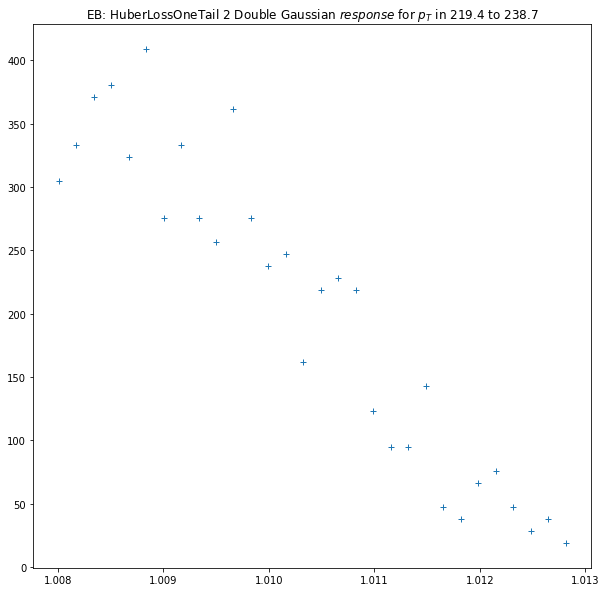

max n:408.92937885 at 1.00883489847
[1.00947285 1.00872624 1.00840402 1.0103637  1.00959516 1.00946152
 1.00869024 1.00861931 1.00860381 1.00869131 1.00843883 1.00910246
 1.00930572 1.01129973 1.01007593 1.00867796 1.01231718 1.0104785
 1.00959706 1.00902057 1.00822198 1.01122653 1.00980973 1.00864398
 1.00896287 1.0103662  1.0099237  1.00841987 1.00827336 1.00872946
 1.01206768 1.00846374 1.00959945 1.01120508 1.00895667 1.00950813
 1.00916505 1.01012599 1.01101184 1.00871468 1.01145434 1.00904965
 1.01080418 1.01206481 1.01104653 1.00899339 1.00819278 1.00809681
 1.00897217 1.00937605 1.00802457 1.01207674 1.01136649 1.00867319
 1.00917184 1.01163232 1.00900126 1.00871015 1.00854313 1.00948989
 1.01035655 1.01219726 1.01115918 1.00919247 1.01037419 1.00970769
 1.01002371 1.00808072 1.01066244 1.01222122 1.00978935 1.00954926
 1.01281238 1.0082984  1.00926125 1.00842679 1.01080191 1.00874341
 1.00944877 1.0106715  1.00832057 1.01087594 1.00921595 1.00971711
 1.01058137 1.01057732 1.01

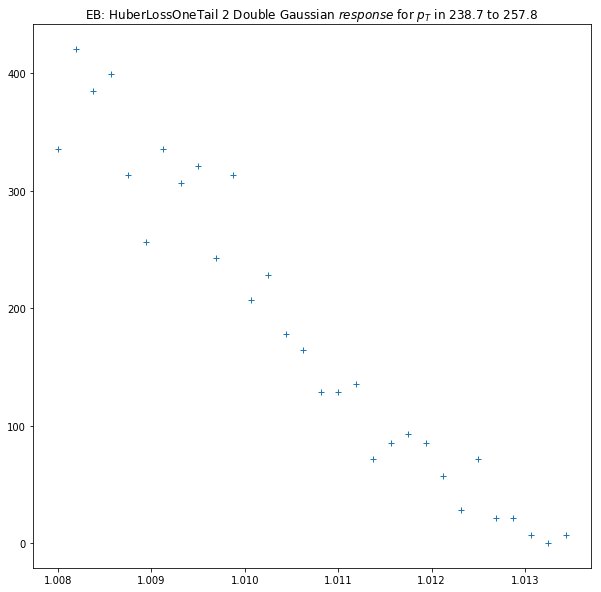

max n:420.517330388 at 1.00819555124
[1.00916243 1.00805819 1.01010776 1.0109458  1.01036489 1.00817335
 1.0094409  1.00819874 1.0090766  1.01005924 1.00800812 1.00956666
 1.00937688 1.01094127 1.00851965 1.01083386 1.00948846 1.01068711
 1.00965846 1.00858176 1.00819695 1.00882304 1.01093531 1.00836277
 1.01019108 1.00820065 1.00902271 1.00865293 1.01022732 1.01208127
 1.00839531 1.00953877 1.01045263 1.00834    1.00969696 1.00833023
 1.00907063 1.0095278  1.01118338 1.01066148 1.0105356  1.00903571
 1.00855517 1.01035035 1.00987911 1.00810218 1.00965786 1.0089407
 1.01146746 1.0120976  1.00939381 1.01214981 1.01143754 1.01024282
 1.01200247 1.01152241 1.00969446 1.00984991 1.01011205 1.01034868
 1.00890934 1.01025355 1.01070046 1.00923181 1.00870085 1.00927317
 1.00833952 1.01102233 1.01338804 1.00814688 1.00819981 1.00923288
 1.00865507 1.01065826 1.01000178 1.01016271 1.01026797 1.01061356
 1.01169384 1.01065898 1.01183867 1.00903583 1.00828421 1.01018775
 1.01126814 1.00904059 1.0

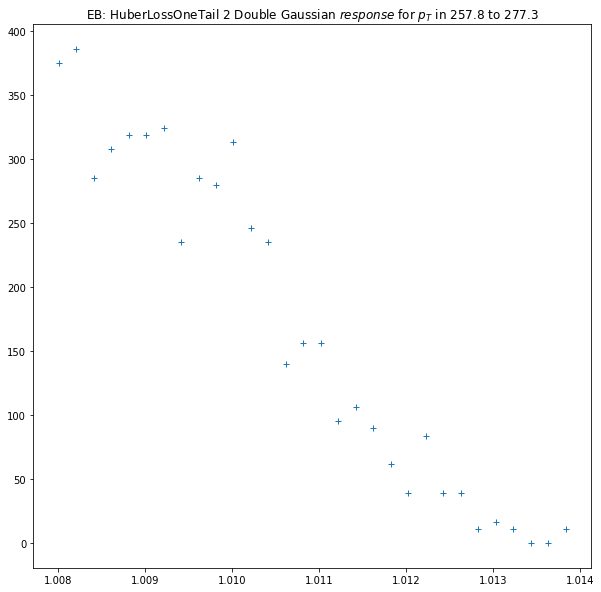

max n:386.155441565 at 1.00820433696
[1.0096755  1.00815547 1.00831056 ... 1.0080328  1.00930023 1.00830507]


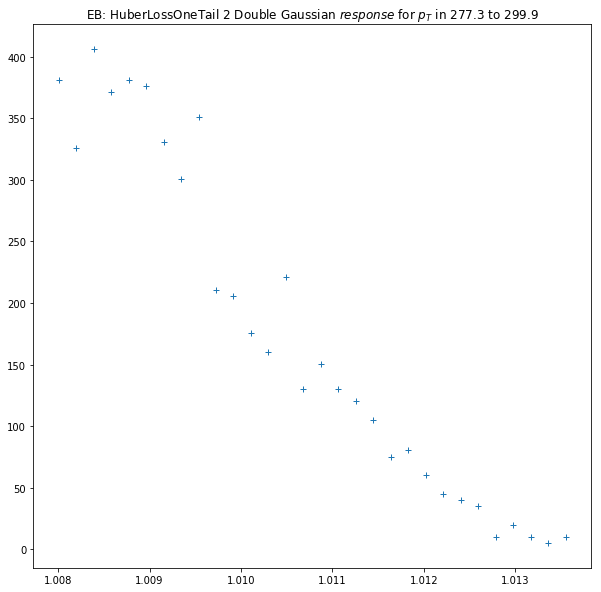

max n:406.22722934 at 1.0083870252
/work/kaechb/applied_EB/HuberLossOneTail_5_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[1.01158237 1.01736379 1.01550317 ... 1.01413894 1.01611245 1.01358402]


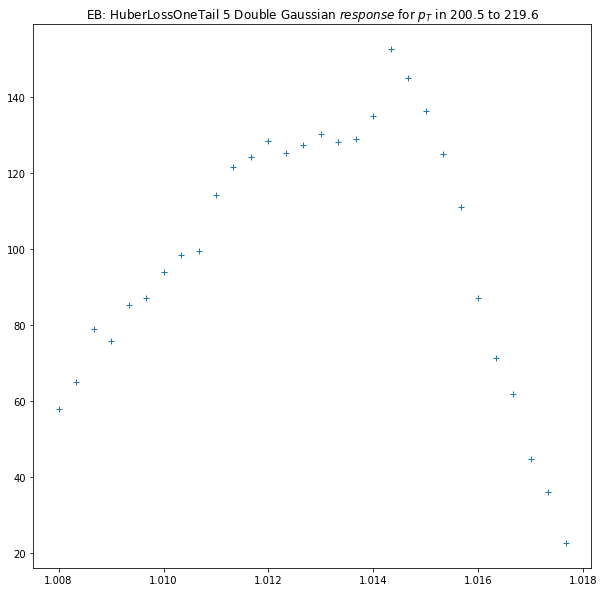

max n:152.735657101 at 1.01433300972
[1.00876153 1.01270711 1.01475585 ... 1.0140661  1.01533282 1.0113759 ]


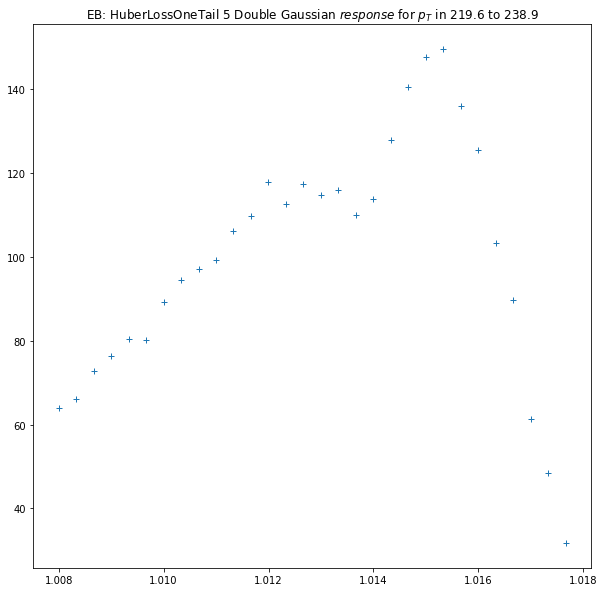

max n:149.673444781 at 1.01533159415
[1.00804389 1.0172323  1.01098478 ... 1.01323926 1.01080179 1.01709783]


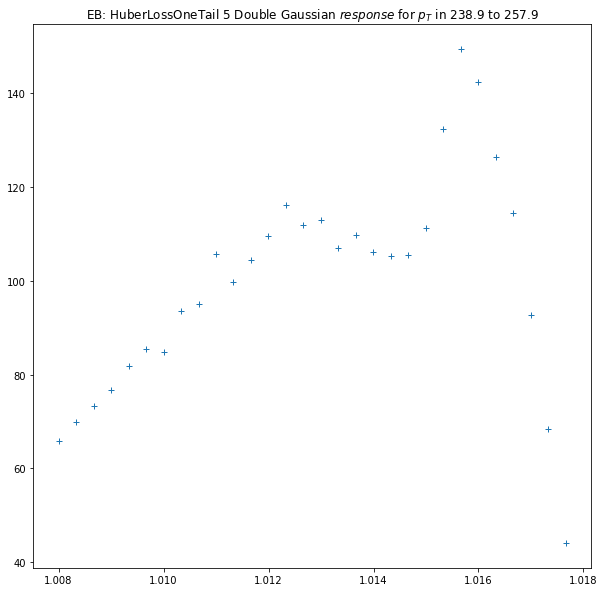

max n:149.364574021 at 1.01566453775
[1.01269734 1.01134074 1.0138377  ... 1.01235485 1.01427794 1.01685166]


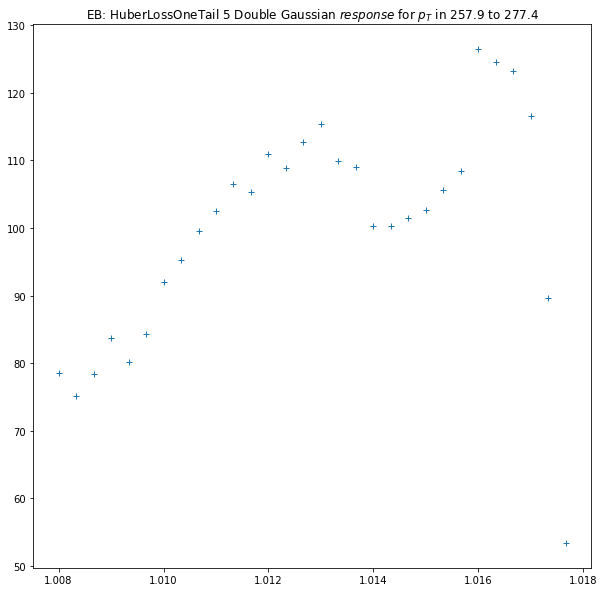

max n:126.459552847 at 1.01599862576
[1.01034391 1.00912118 1.01004088 ... 1.0168643  1.01368773 1.01486564]


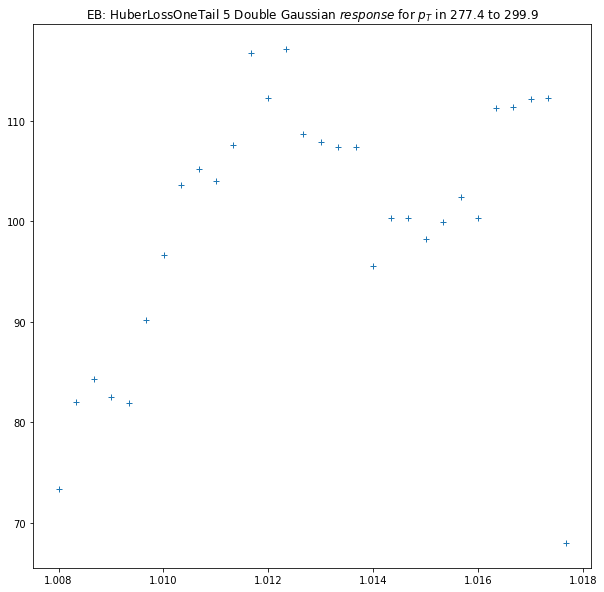

max n:117.130915728 at 1.0123338143
/work/kaechb/applied_EB/HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[]


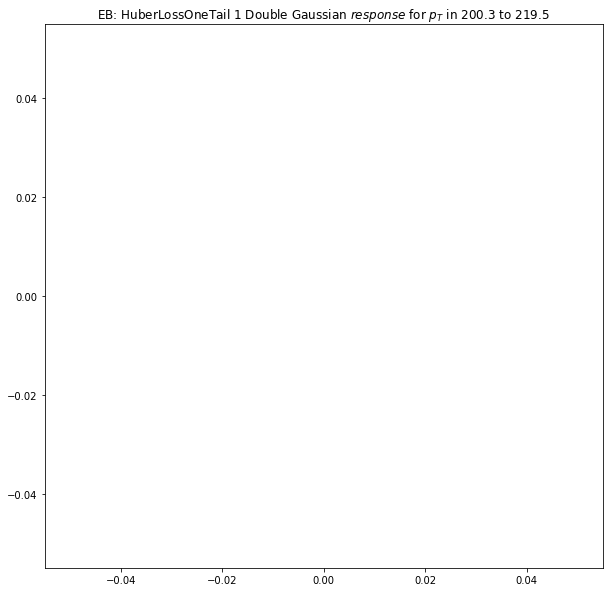

max n:nan at 0.0
[]


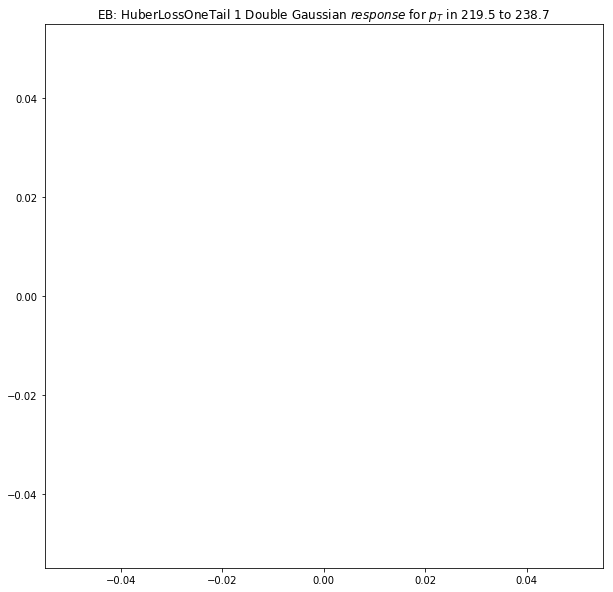

max n:nan at 0.0
[]


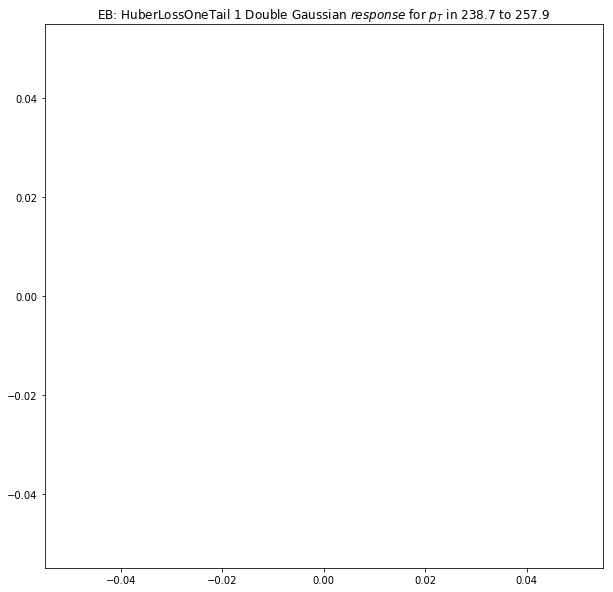

max n:nan at 0.0
[]


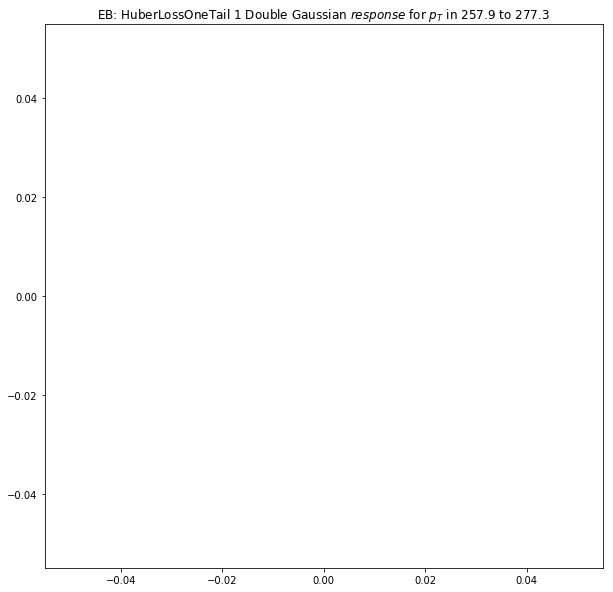

max n:nan at 0.0
[]


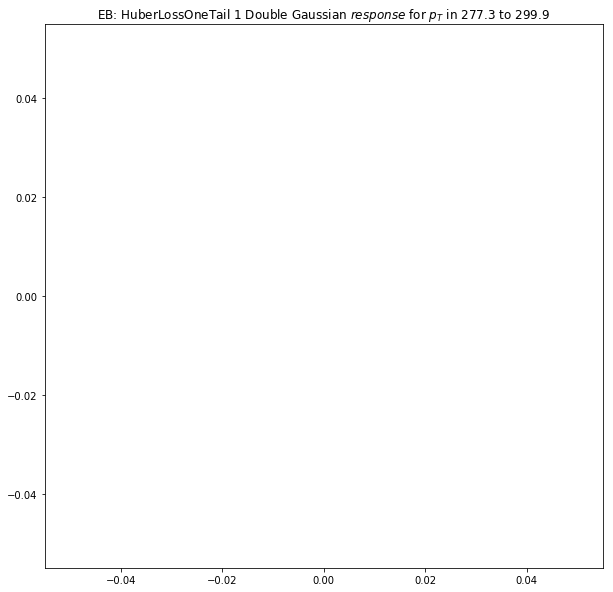

max n:nan at 0.0
/work/kaechb/applied_EB/HuberLossOneTail_2_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[1.00964093 1.0090636  1.00990415 1.0094409  1.01059675 1.00967097
 1.00827062 1.01122653 1.01019108 1.01347101 1.00919735 1.01022732
 1.00872946 1.01206768 1.00959945 1.01015687 1.00968111 1.00903487
 1.01098919 1.00871468 1.01099551 1.00844443 1.01175427 1.00890934
 1.01078224 1.00945365 1.00808549 1.01061356 1.01065898 1.01186323
 1.01018775 1.00915432 1.00808072 1.00848174 1.00905252 1.00919831
 1.00919545 1.00819707 1.00980246 1.00811613 1.00822425 1.01041675
 1.00839114 1.00883901 1.01091206 1.00906944 1.01082587 1.00933301
 1.00926757 1.01114607 1.01096928 1.01052833 1.00844669 1.01013303
 1.01075494 1.00947917 1.00990498 1.01111591 1.0086565  1.01034677
 1.01032996 1.01069903 1.00916529 1.00862753 1.00800562 1.00919282
 1.01048243 1.01229167 1.0102464  1.00822031 1.01004457 1.01191628
 1.010463   1.00946569 1.00908971 1.00873816 1.00876653 1.00891674
 1.0093838 

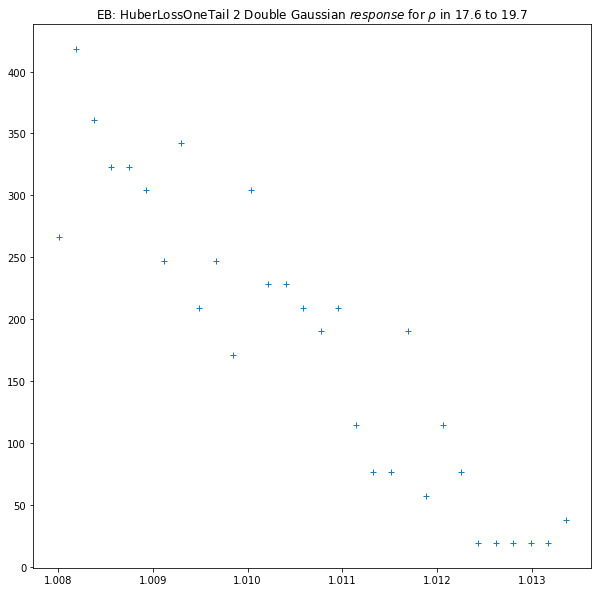

max n:418.281551693 at 1.00819016695
[1.00916243 1.00869274 1.00847578 1.00864434 1.00968111 1.00891685
 1.00811779 1.01010537 1.00854909 1.00870275 1.01083386 1.00836277
 1.00857413 1.00836802 1.01089728 1.00961185 1.00836504 1.00916505
 1.00854969 1.0120976  1.00939381 1.00997996 1.00969446 1.00877357
 1.00927317 1.01108277 1.00923288 1.01207316 1.01010251 1.00917184
 1.01183867 1.0085628  1.00899494 1.00849557 1.00811982 1.00912189
 1.00919247 1.0103792  1.01002371 1.01041114 1.01124406 1.01259947
 1.00808048 1.00966549 1.00898457 1.0082854  1.01088345 1.01087809
 1.00902379 1.00877011 1.01009774 1.0080775  1.01167631 1.0096283
 1.00816417 1.01046407 1.00913751 1.01281142 1.01093566 1.01051784
 1.00942326 1.01056099 1.0093118  1.01011109 1.00857675 1.00886202
 1.01044226 1.00918221 1.01309514 1.00857472 1.01117468 1.00924301
 1.00943875 1.01164889 1.00841761 1.01299691 1.00927854 1.00890243
 1.01228487 1.00835264 1.01145244 1.00865722 1.00905645 1.00856173
 1.00999939 1.00965416 1.0

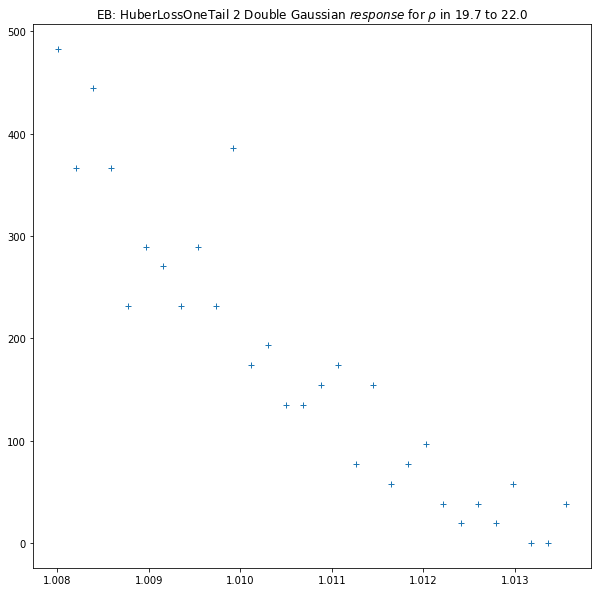

max n:482.77542832 at 1.00801253319
[1.0094192  1.01023102 1.00930572 1.01094127 1.01068711 1.00970507
 1.0095681  1.00961232 1.00953877 1.00963318 1.01073599 1.00910342
 1.01035035 1.00959373 1.00894952 1.00965786 1.00933802 1.01011205
 1.00809681 1.01338804 1.01157796 1.01113319 1.00843692 1.01043046
 1.01126814 1.00867391 1.01219726 1.00925446 1.00825405 1.01066244
 1.01222122 1.00889778 1.01036334 1.00926125 1.00847709 1.00911701
 1.00929284 1.01140988 1.01069903 1.0097518  1.00885987 1.00913084
 1.0093751  1.0092032  1.00800562 1.00886095 1.00964999 1.012398
 1.00972521 1.01028991 1.01268339 1.00992274 1.00881422 1.00808954
 1.00859654 1.00943029 1.00883961 1.01166356 1.01238418 1.00997841
 1.01056397 1.00976157 1.01148164 1.01132214 1.0105176  1.0107336
 1.009238   1.01099646 1.01001859 1.00900018 1.01025891 1.00839555
 1.00851655 1.00892472 1.0095166  1.00964546 1.00927579 1.0089128
 1.00843179 1.00901377 1.01180494 1.01057947 1.00927889 1.0118016
 1.00909245 1.00833821 1.008100

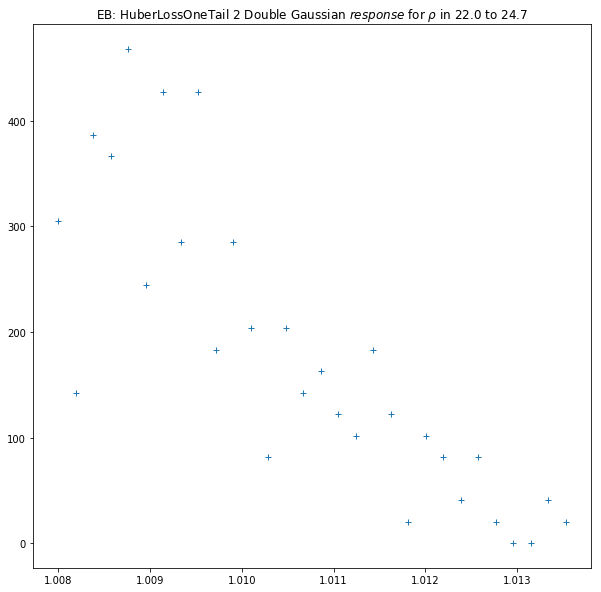

max n:468.227434619 at 1.00876719157
[1.01139092 1.01111376 1.00860953 1.00978339 1.00959516 1.01031482
 1.01129973 1.00965846 1.01127791 1.01125324 1.00822198 1.01239836
 1.00810206 1.00961518 1.00834    1.00841987 1.01206481 1.01152241
 1.00978839 1.00912189 1.01169384 1.01017392 1.00854313 1.01306605
 1.01037419 1.01044202 1.00809896 1.0125221  1.00849378 1.01085234
 1.00890088 1.00989509 1.00972474 1.0093385  1.00978839 1.00851595
 1.01082063 1.0082742  1.01063073 1.00827765 1.01028037 1.00877655
 1.01044023 1.01215923 1.00939703 1.01100981 1.01213348 1.00806797
 1.00965667 1.01339173 1.00808084 1.01075888 1.00931203 1.01198947
 1.00970173 1.00872433 1.00811851 1.00810599 1.01073086 1.00876153
 1.00882399 1.00807357 1.01020479 1.00870907 1.00836658 1.00994945
 1.00868809 1.00956905 1.00978482 1.00912297 1.00847781 1.00961936
 1.0123688  1.00879288 1.01065469 1.01067412 1.01059902 1.00896192
 1.01095104 1.0088737  1.00889218 1.008412   1.00956213 1.01165462
 1.00984514 1.01077509 1.

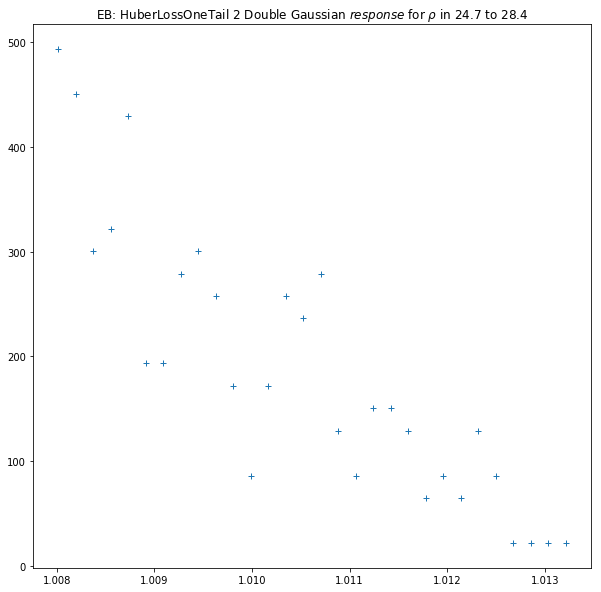

max n:493.856761101 at 1.00801801682
[1.01018167 1.00817335 1.01009941 1.0090766  1.00997591 1.00907457
 1.00968289 1.01208127 1.00833023 1.00890088 1.00812829 1.00950813
 1.01143754 1.0092274  1.00890386 1.00969756 1.00814688 1.0097003
 1.01065826 1.00900126 1.00919032 1.00889206 1.01113129 1.0082984
 1.00936186 1.01139677 1.01004231 1.00808012 1.00998056 1.008955
 1.00971031 1.01001525 1.01106989 1.01053977 1.00963473 1.00844419
 1.00899255 1.0112499  1.00870752 1.00908363 1.0116688  1.00941288
 1.01236045 1.00856435 1.00857532 1.00970423 1.00800574 1.01040828
 1.0099678  1.00823355 1.01282573 1.01115096 1.00854135 1.01133847
 1.01148391 1.01150632 1.00881326 1.00803816 1.01055849 1.01277065
 1.00939679 1.01089895 1.00872838 1.0102123  1.01320279 1.0113759
 1.00930023 1.00837231 1.00847197 1.00937068 1.0099299  1.00841498
 1.00871336 1.00852323 1.00801253 1.00850618 1.00936294 1.01292408
 1.00960279 1.00803876 1.00981629 1.00861156 1.01069856 1.01085007
 1.00984275 1.01039028 1.00812

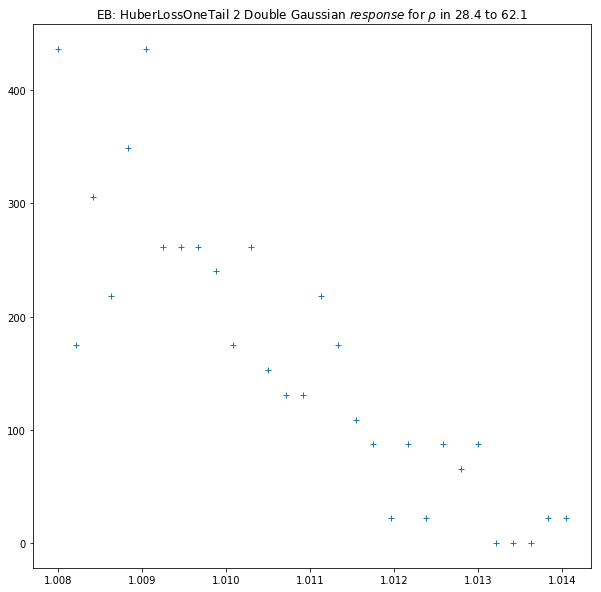

max n:436.47019647 at 1.00800573826
/work/kaechb/applied_EB/HuberLossOneTail_5_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[1.01036036 1.01223552 1.01269734 ... 1.01100707 1.01685166 1.01075602]


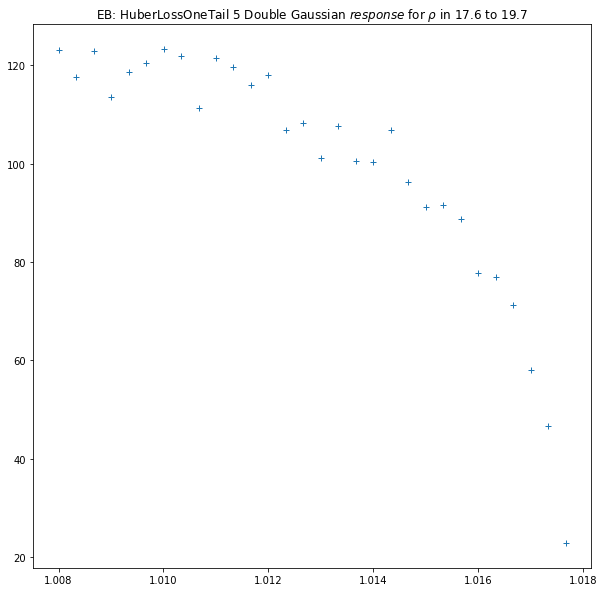

max n:123.32621542 at 1.01000041962
[1.01749468 1.01753831 1.01176786 ... 1.01665342 1.01414239 1.01250446]


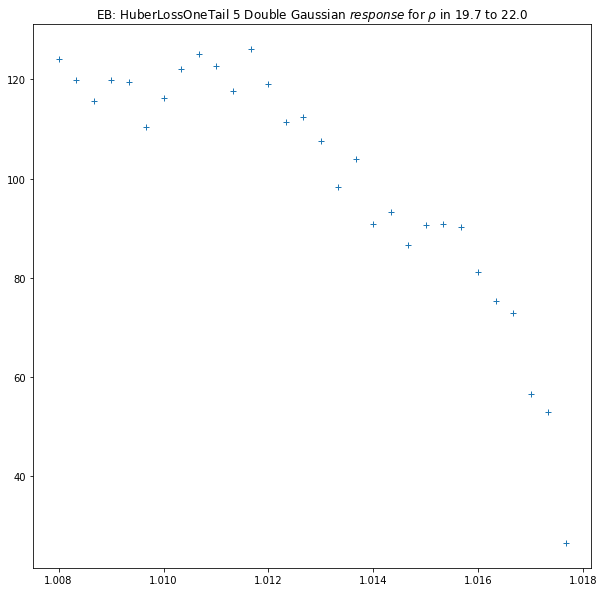

max n:126.130101032 at 1.01166680654
[1.01034391 1.01588607 1.00819087 ... 1.00932324 1.01528704 1.00806677]


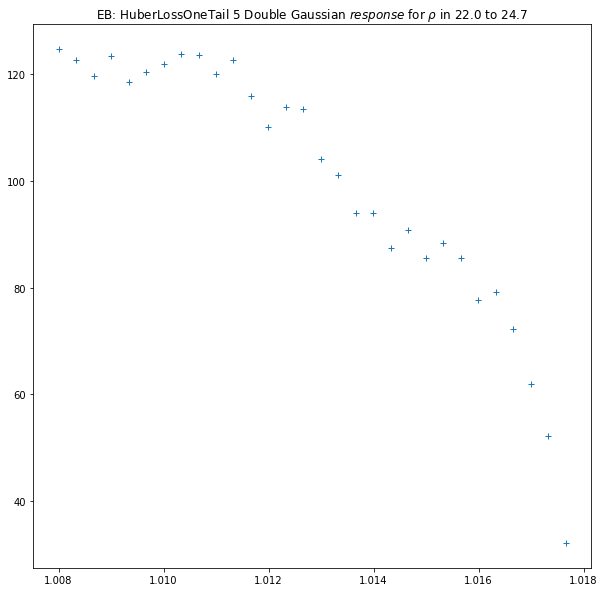

max n:124.774379129 at 1.00800085068
[1.01357353 1.01644886 1.01328647 ... 1.01226366 1.01309478 1.0132612 ]


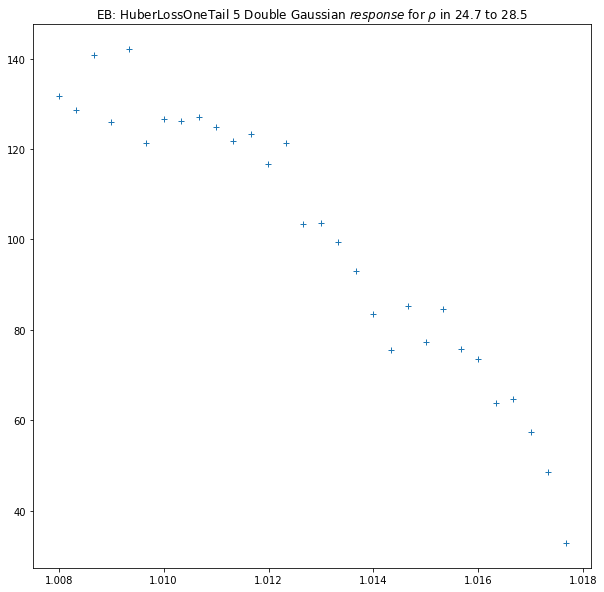

max n:142.155162893 at 1.00933310986
[1.01656461 1.01660752 1.01099527 ... 1.0098722  1.0168643  1.01533282]


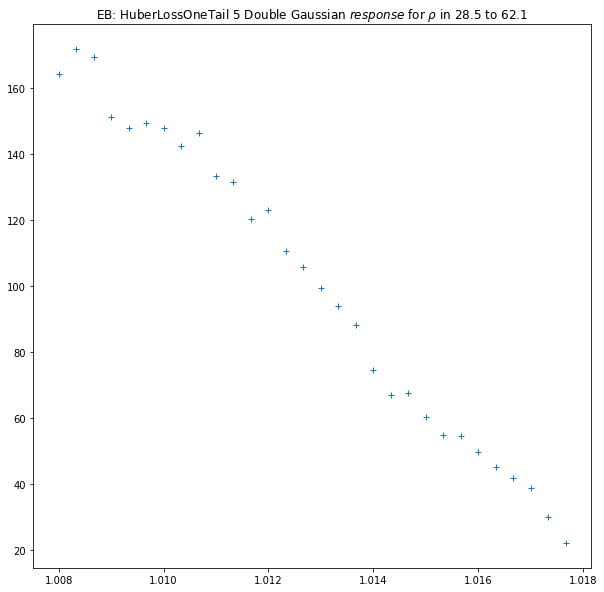

max n:171.78569568 at 1.00833332141
/work/kaechb/applied_EB/HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[]


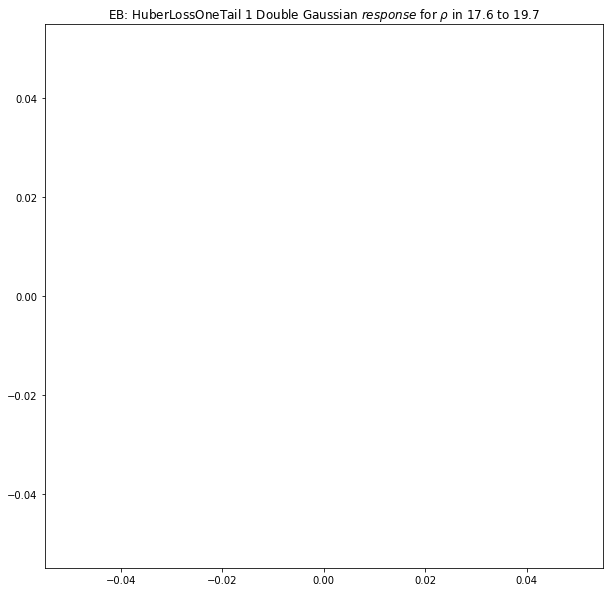

max n:nan at 0.0
[]


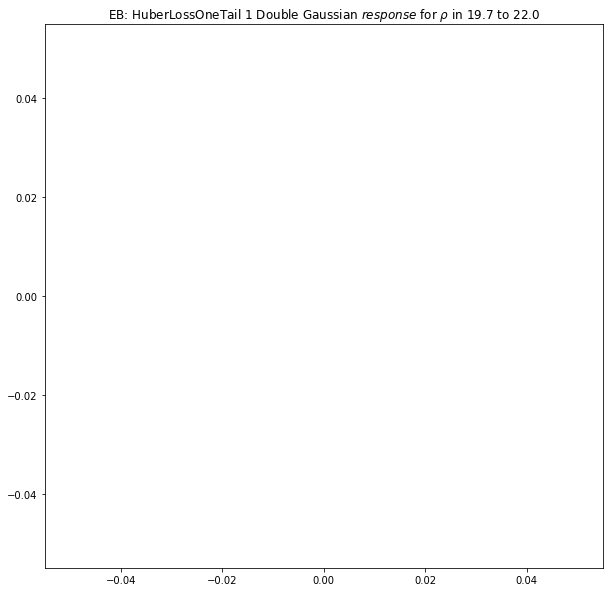

max n:nan at 0.0
[]


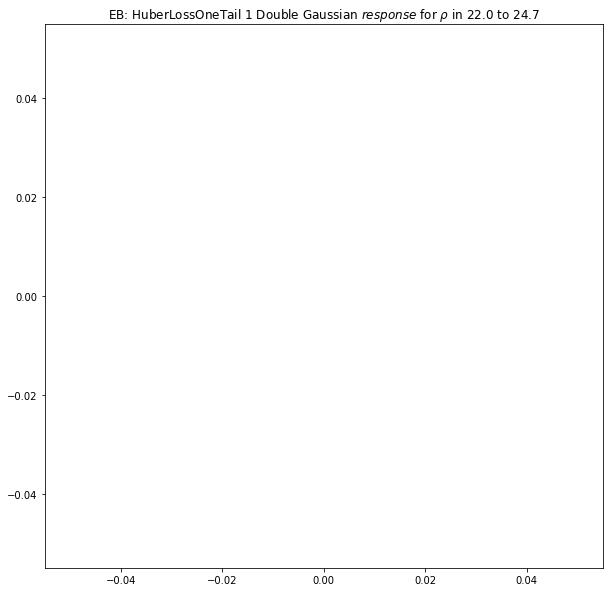

max n:nan at 0.0
[]


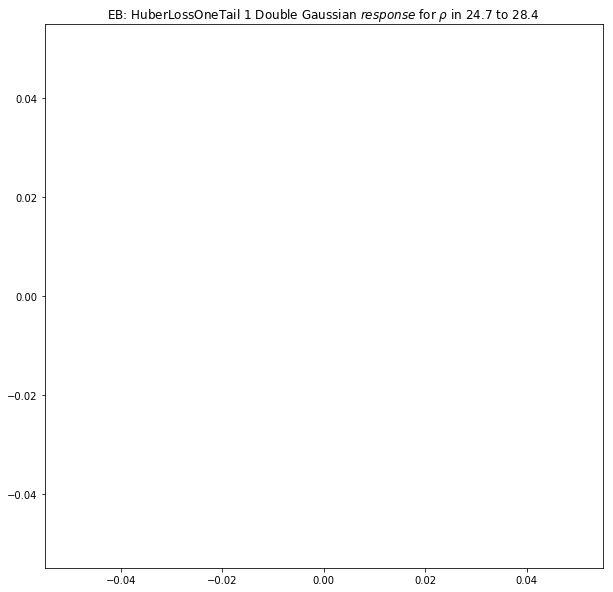

max n:nan at 0.0
[]


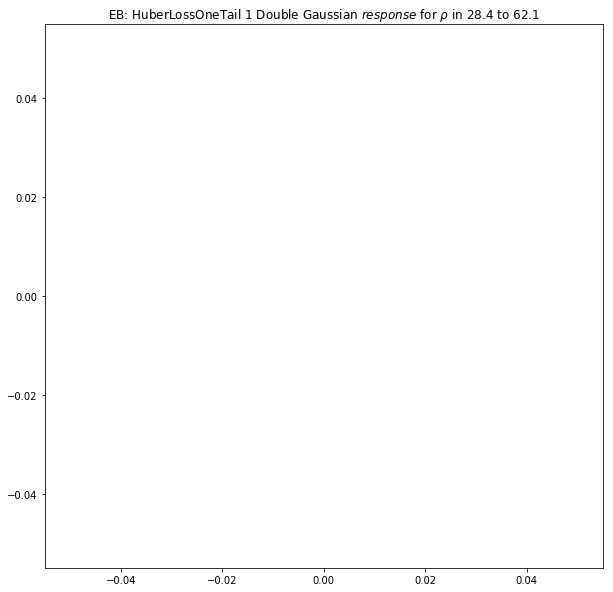

max n:nan at 0.0
/work/kaechb/applied_EB/HuberLossOneTail_2_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[1.00831056 1.00964093 1.00898719 1.00858176 1.00936007 1.01038229
 1.01208127 1.0095278  1.00854969 1.00871468 1.0097723  1.00944793
 1.00984991 1.01197195 1.00908732 1.00923181 1.0096215  1.01016271
 1.01303327 1.01026797 1.0088253  1.00944459 1.01029766 1.00991809
 1.00936186 1.00919831 1.0084275  1.01019669 1.01099765 1.01116276
 1.01265013 1.01044941 1.00806606 1.00922704 1.00830734 1.00996256
 1.01149797 1.00972521 1.00967133 1.00965667 1.00862849 1.00974786
 1.01124096 1.01124334 1.00873184 1.0093118  1.00824308 1.0082041
 1.00919974 1.00889325 1.01277065 1.00827754 1.0082885  1.01095927
 1.00952208 1.00913942 1.00980699 1.00890017 1.01307142 1.0131036
 1.01116729 1.00887382 1.01171732 1.01256919 1.00983751 1.00948083
 1.01177669 1.01012027 1.01008165 1.00881565 1.00822163 1.00942349
 1.01173699 1.00963604 1.00923848 1.00812364 1.00906384 1.00958717
 1.01071036 1

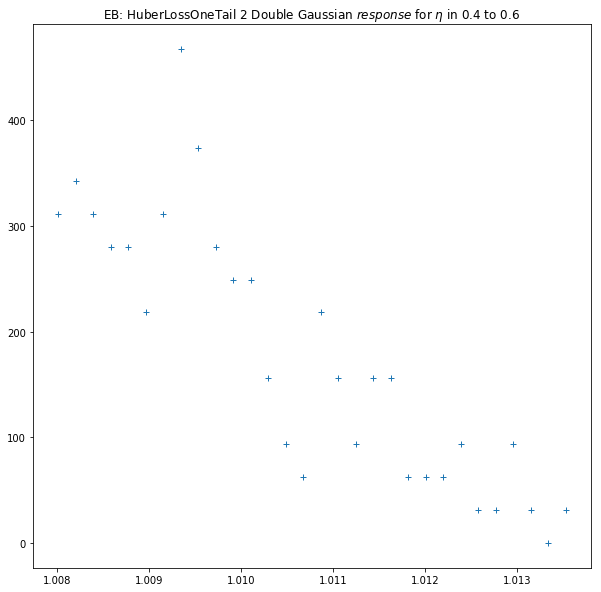

max n:467.193687042 at 1.00934787591
[1.00920749 1.00802648 1.01107073 1.00845706 1.0109458  1.011531
 1.00869131 1.01007593 1.00867796 1.0104785  1.01127791 1.0104295
 1.00836277 1.01347101 1.00902271 1.00896287 1.00962687 1.00985539
 1.01196969 1.00903487 1.01098919 1.00939381 1.01080418 1.01143754
 1.01200247 1.01011205 1.01025355 1.00819278 1.01111829 1.01102233
 1.01136649 1.01061356 1.01169384 1.01183867 1.01163232 1.01126814
 1.01247358 1.0081104  1.00907648 1.0103792  1.0103327  1.00973737
 1.00914657 1.00980246 1.01140988 1.01058137 1.00893748 1.00891984
 1.00998056 1.0100565  1.0101335  1.01095855 1.00991654 1.0080775
 1.01028037 1.00984716 1.01403975 1.01013303 1.00802732 1.01075494
 1.00859618 1.01281142 1.01339173 1.01268339 1.01051784 1.01138651
 1.0103085  1.00943029 1.00961494 1.01166356 1.00876558 1.01095748
 1.01011109 1.00914109 1.00958455 1.00848508 1.01044226 1.01133847
 1.01148164 1.01148391 1.00957739 1.00916409 1.00803816 1.01099646
 1.00878727 1.01050413 1.0111

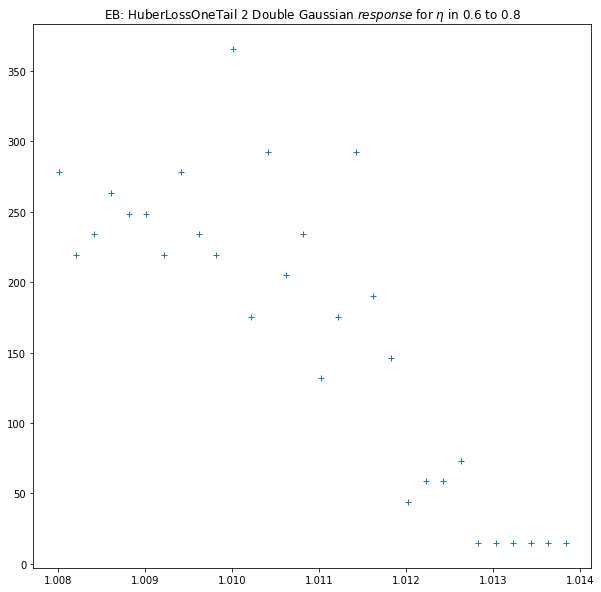

max n:365.675599331 at 1.01001818975
[1.0096755  1.00947285 1.01100445 1.01122546 1.00844026 1.00879073
 1.0103637  1.01235354 1.00990415 1.01208997 1.00876963 1.01092517
 1.011132   1.01005924 1.00800812 1.01023102 1.00870275 1.00930572
 1.00943291 1.01094127 1.01231718 1.01059675 1.01068711 1.00959706
 1.00819695 1.00882304 1.01102078 1.01122653 1.01019108 1.00977504
 1.0099237  1.00834    1.01118338 1.00836802 1.00872946 1.01106989
 1.01066148 1.00959945 1.00825489 1.00855517 1.00965786 1.00989866
 1.01012599 1.01101184 1.0120976  1.00960839 1.01169765 1.01206481
 1.01104653 1.01034868 1.00890934 1.00817573 1.00972474 1.00897217
 1.00890386 1.00870085 1.00978017 1.01060283 1.0097003  1.01065826
 1.01000178 1.01043046 1.00957227 1.01082289 1.00868118 1.00914645
 1.00919247 1.00931799 1.00829637 1.00983799 1.01062608 1.009817
 1.01106894 1.01276076 1.01036334 1.00926125 1.00978076 1.01032698
 1.00864625 1.00983644 1.00901937 1.01137853 1.01046646 1.00808108
 1.00832057 1.00939858 1.00

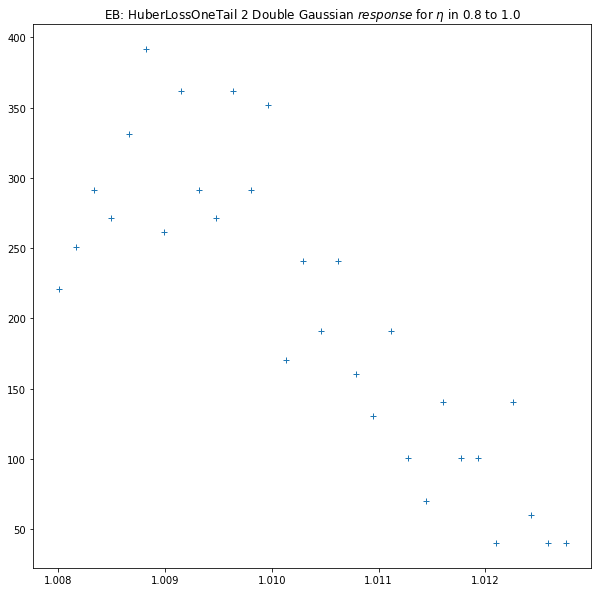

max n:391.723933581 at 1.00882341464
[1.00968111 1.00959516 1.00891685 1.00819874 1.00876737 1.00853622
 1.01083386 1.00948846 1.00822067 1.00918269 1.01239836 1.01027882
 1.00805235 1.00820065 1.01143432 1.00874114 1.01000977 1.00841987
 1.01015687 1.01120508 1.00836504 1.0092274  1.00825822 1.00833952
 1.00802457 1.01207674 1.00865507 1.00848281 1.01097906 1.00849557
 1.00874782 1.00816834 1.00967681 1.01254237 1.00977218 1.01151657
 1.00911701 1.00849402 1.00913513 1.01171029 1.00921595 1.00811613
 1.00896299 1.00928831 1.0088048  1.01123488 1.00890982 1.00898457
 1.00889611 1.00882339 1.00978839 1.01056266 1.0080092  1.01082063
 1.00926757 1.00801754 1.00854313 1.00939047 1.0098995  1.00834441
 1.01001632 1.01154852 1.00978088 1.0080353  1.00806797 1.01038849
 1.00899398 1.0087682  1.00800574 1.0095551  1.00984848 1.00811851
 1.00979769 1.00862753 1.01121783 1.00953043 1.00879025 1.00800431
 1.00857472 1.01117468 1.00901973 1.00807357 1.01229167 1.00869918
 1.00995743 1.00866938 1.

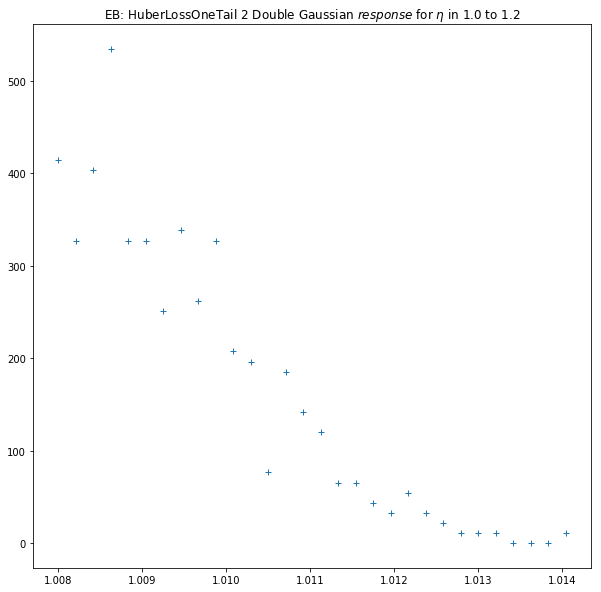

max n:534.553611186 at 1.00862929821
[1.01139092 1.0085268  1.0086813  1.00864434 1.00840402 1.01031482
 1.0094192  1.01010537 1.01268458 1.00843883 1.00834084 1.00907183
 1.00967097 1.01125324 1.0121696  1.00961518 1.00966454 1.00890088
 1.00961185 1.01031137 1.00959373 1.01099551 1.00974333 1.00997996
 1.01076913 1.00917053 1.00912678 1.00969756 1.01108277 1.00978839
 1.01006556 1.00843692 1.00912189 1.01082027 1.00867319 1.00880337
 1.00915432 1.00866234 1.00994933 1.00919032 1.00808072 1.00889778
 1.01124406 1.00862277 1.0125221  1.00945091 1.00966549 1.01109552
 1.0084852  1.00971031 1.0097518  1.0082854  1.00991309 1.00972474
 1.0093385  1.00917315 1.01009774 1.00933301 1.00851595 1.00959408
 1.01053977 1.00851321 1.01227641 1.00890231 1.01158822 1.01114607
 1.01167631 1.01048183 1.00816417 1.01103473 1.00813401 1.00913751
 1.01111591 1.01037812 1.010903   1.01056564 1.01135266 1.00810754
 1.00834715 1.0086652  1.0100069  1.00849676 1.00800562 1.00923443
 1.00851119 1.00817204 1.

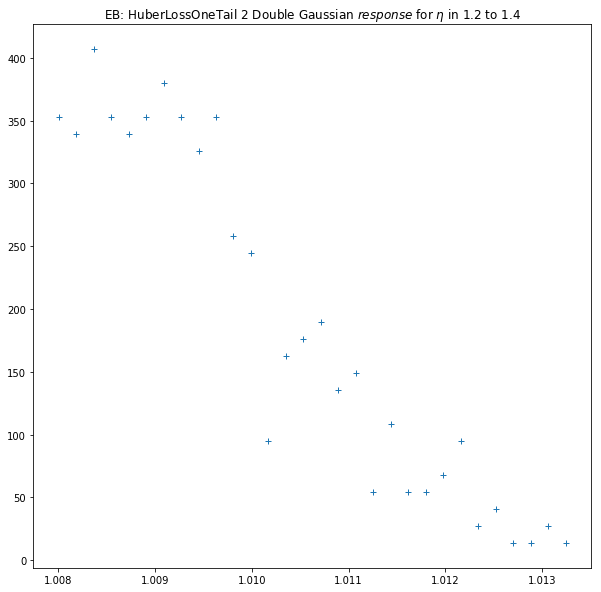

max n:407.090140863 at 1.00836686293
/work/kaechb/applied_EB/HuberLossOneTail_5_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[1.01357353 1.01619554 1.01660752 ... 1.0140661  1.01055396 1.01187003]


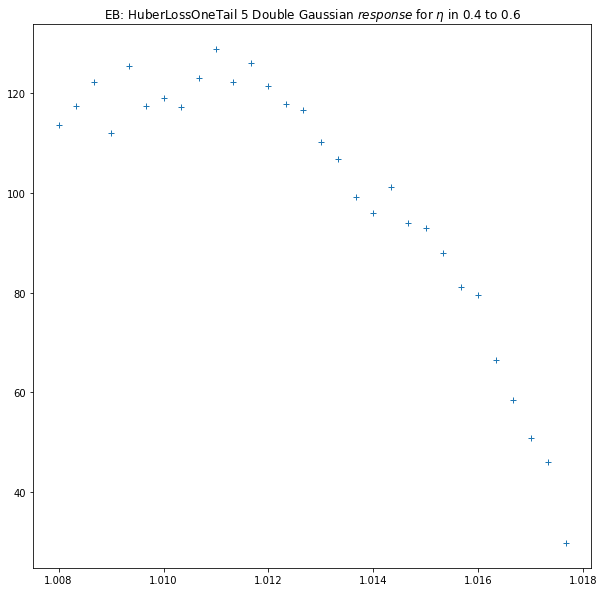

max n:128.892531965 at 1.01099970341
[1.00912118 1.01322412 1.01644886 ... 1.01309478 1.01611245 1.01075602]


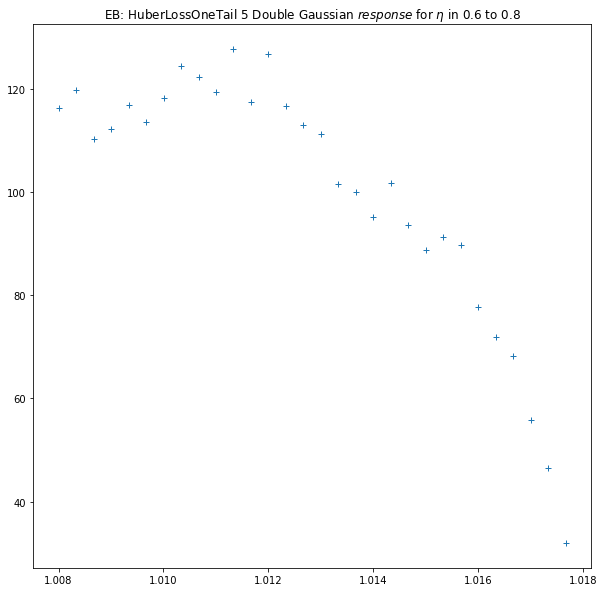

max n:127.742637061 at 1.01133378347
[1.01158237 1.00927126 1.01013231 ... 1.01182377 1.01403046 1.0098139 ]


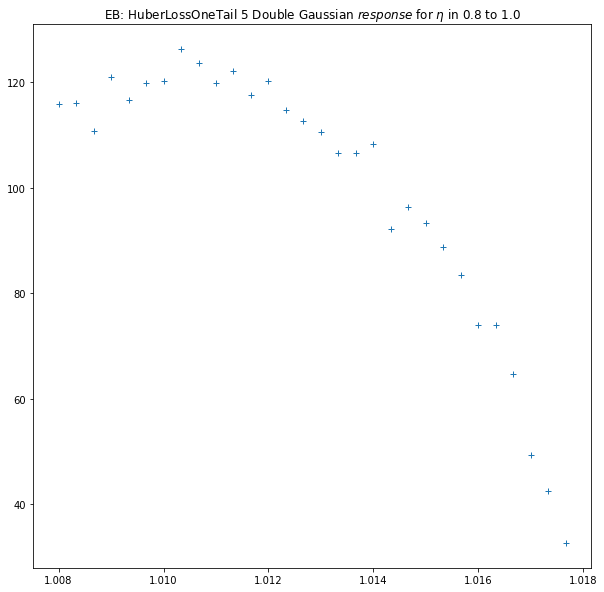

max n:126.331389042 at 1.01033343077
[1.0133878  1.01421356 1.01254034 ... 1.01528704 1.01358402 1.01119328]


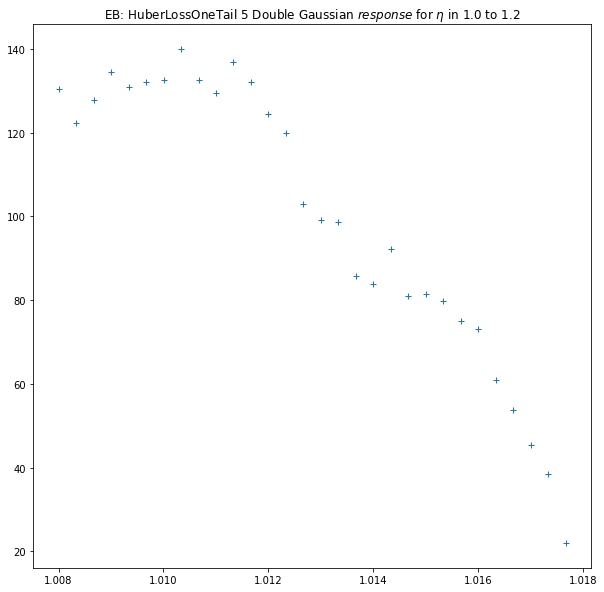

max n:140.025148339 at 1.01033368508
[1.00802958 1.01306391 1.01647413 ... 1.01017773 1.00927031 1.01177084]


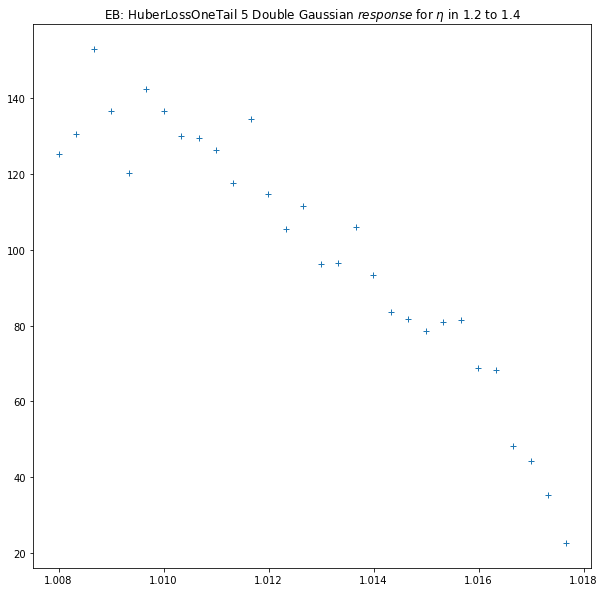

max n:153.035115393 at 1.00866662661
/work/kaechb/applied_EB/HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
[]


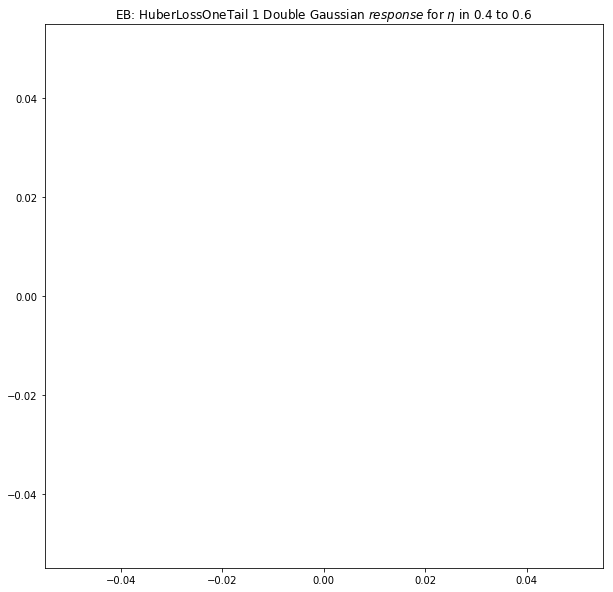

max n:nan at 0.0
[]


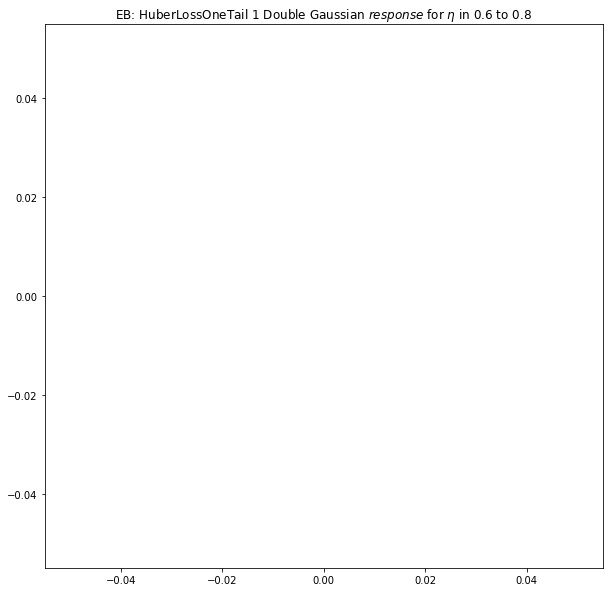

max n:nan at 0.0
[]


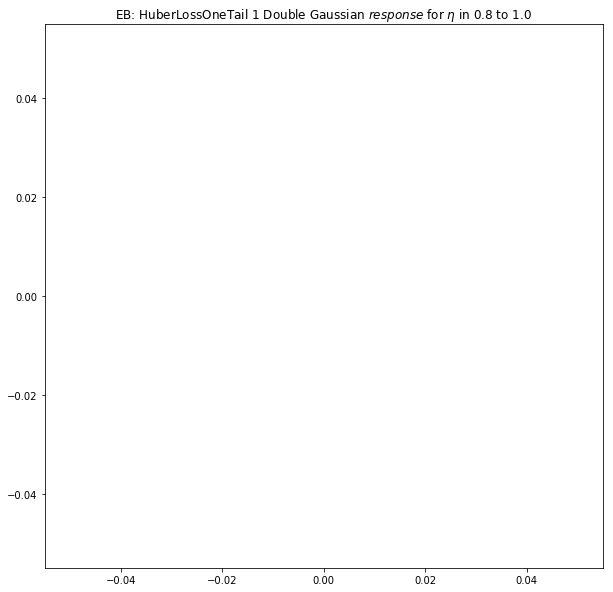

max n:nan at 0.0
[]


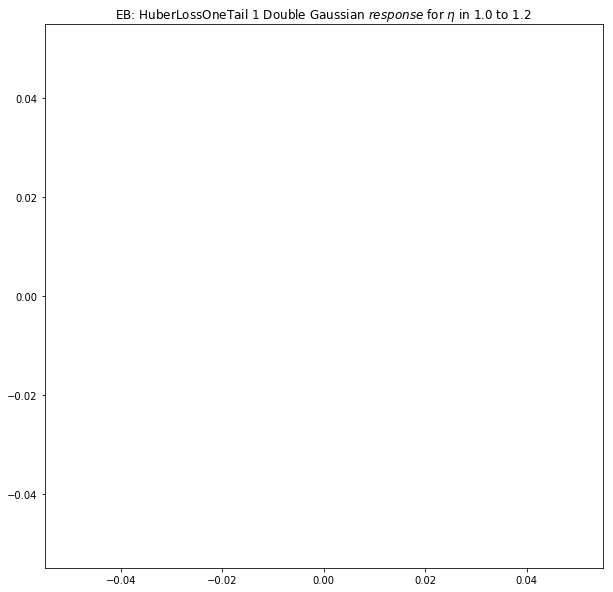

max n:nan at 0.0
[]


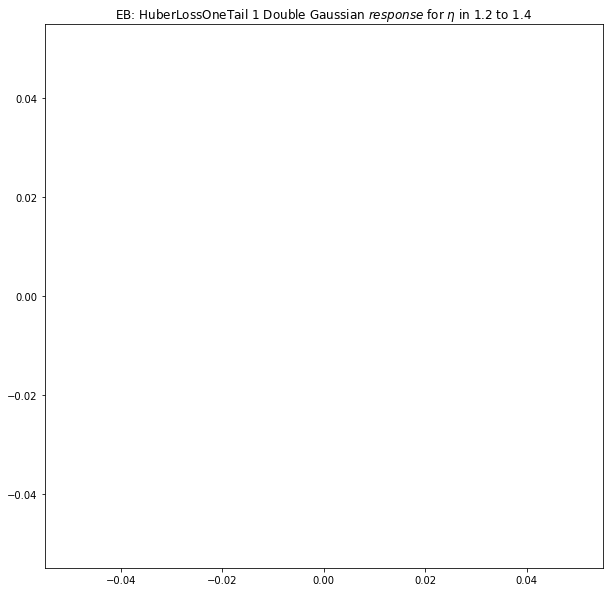

max n:nan at 0.0


In [4]:
%matplotlib inline
parent_dir="/work/kaechb/applied_EB/"
names=[]
for dire in os.listdir(parent_dir):
      
    #if  os.path.isdir("/work/kaechb/"+dire):
        for file in os.listdir(parent_dir+dire):#+"/"+dire
        #for file in os.listdir(sys.argv[1]):
            if file.find('.hd')!=-1 and file.find('applied')!=-1 :
               # input_dir.append(parent_dir)#+dire+"/"][0]
                
                names.append(dire+"/"+file)
print(names)
matplotlib.rcParams['figure.figsize'] = [10, 10]
inp_dir=parent_dir
bins_gaussian_amount=100
bins_double_gaussian_amount=20
amountbins_column=15
debug_fit=0
debug_fit_gauss=0
amountbins=30

for column in ['pt','rhoValue','scEta']:#
    if column=='pt':
        xlab="$p_T$"
    if column=='rhoValue':
        xlab="$\\rho$"
    if column=='scEta':
        xlab="$\eta$"
    profile_x=[]
    profile_y=[]
    profile_ef=[]
    profile_down=[]
    profile_up=[]
    profile_sigma_l=[]
    profile_sigma_l_err=[]

    for k in range(0,len(names)):#len(names)
        if names[k].find("EE")>-1:
            tag="EE"
        if names[k].find("EB")>-1:
            tag="EB"

        if names[k].find("OneTail")>-1:
                end="HuberLossOneTail"
                delta=names[k].split("_")[1]

        elif names[k].find("Huber")>-1:
                end="HuberLoss"
                delta=names[k].split("_")[1]
                continue
        elif names[k].find("mse")>-1:
                end="mse"
                delta=""
                continue
        plot_out_dir="/work/kaechb/"+end+"_"+delta+"/" 

        if not os.path.exists(plot_out_dir):
            os.makedirs(plot_out_dir)
        inp_file=names[k]
        original_df=io.read_data('%s%s'%(inp_dir,inp_file),columns=None)
        print('%s%s'%(inp_dir,inp_file))
        print(end)

        lower_bound=0.5
        upper_bound=1.5

        y_plot=np.zeros(amountbins)
        x_plot=np.zeros(amountbins)
        y_err_fit=np.zeros(amountbins)
        sigma_l=np.zeros(amountbins)
        sigma_l_err=np.zeros(amountbins)
        y_err_L_sigma=np.zeros(amountbins)
        y_err_R_sigma=np.zeros(amountbins)
        df=original_df.copy()


        df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values)
        df=df[df['response']>lower_bound]
        df=df[df['response']<upper_bound]

        df.loc[:,'response_NN_'+end]=np.reciprocal(df.loc[:,'response_NN_'+end].values)
        df=df[df['response_NN_'+end]>lower_bound]
        df=df[df['response_NN_'+end]<upper_bound]
        df=df[df['pt']>0]
        df=df[df['pt']<300]
#        df.loc[:,column[:2]]=df[abs(df[column[:2]]-df[column[:2]].mean())<3*df[column[:2]].std()][column[:2]] #outlier fuck up binning otherwise
        notused,bins_column=pd.qcut(df[column],amountbins_column, retbins=True)   
    
        for i in range(0,len(bins_column)-1):
              if i>=10:
                df_temp=df[df[column] >=bins_column[i]]
                df_temp=df_temp[df_temp[column]<=bins_column[i+1]]
                
                
                data=df_temp.loc[:,'response_NN_'+end].astype(float).values
                        
                data=data[data>1.008]
                data=data[data<1.018]
                print(data)
                n,bins_gauss,patches=plt.hist(data,bins=30,density=True)
                plt.close()
                plt.plot(bins_gauss[:-1],n,'+')
                plt.title("{}: {} {} Double Gaussian $response$ for {} in {} to {}".format(tag,end,delta,xlab,int(10*bins_column[i])/10.,int(10*bins_column[i+1])/10.))
                
                plt.show()
        
            
                
                
               # data=data[data<bins_gauss[np.min([len(n)-1,np.argmax(n)+70])]]
                n_max=np.argmax(n)
                print("max n:{} at {}".format(np.max(n),bins_gauss[n_max]))
                #bound_gauss=[,bins_gauss[np.argmax(n)]+.005]

                plt.show()

                

### TO COMPARE DIFFERENT LOSS FUNCTIONS

['HuberLossOneTail_2_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLossOneTail_5_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_5_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_2_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5', 'mse_EB_1_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5']
/work/kaechb/applied_EB/HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
(0.9943522, 299.99942)


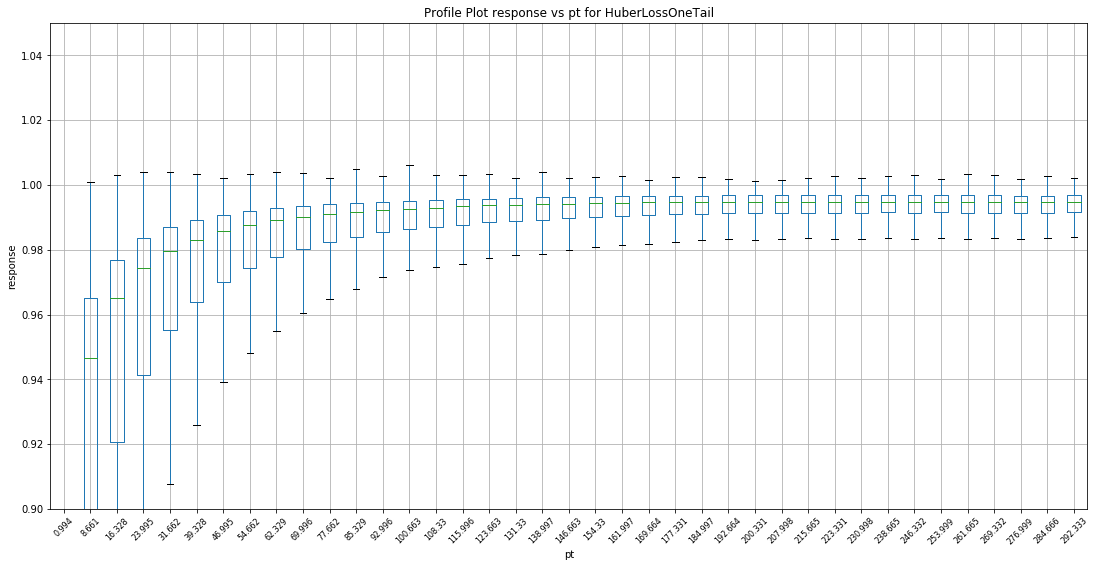

/work/kaechb/applied_EB/mse_EB_1_applied/applied_res_2019-05-02_EB.hd5
mse
(0.9943522, 299.99942)


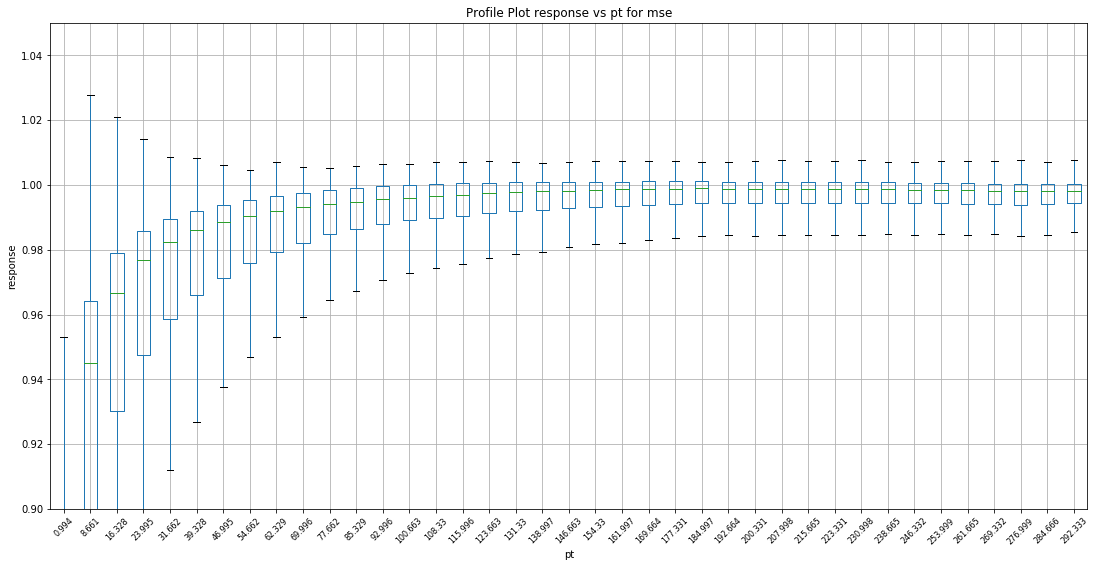

/work/kaechb/applied_EB/HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.9943522, 299.99942)


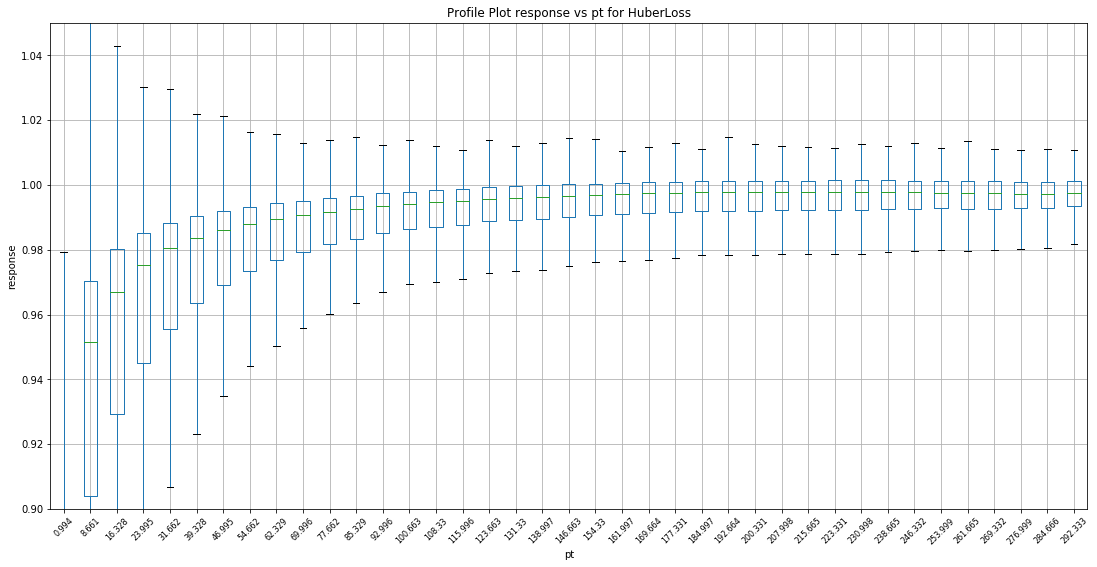

/work/kaechb/applied_EB/HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
(0.0, 62.157448)


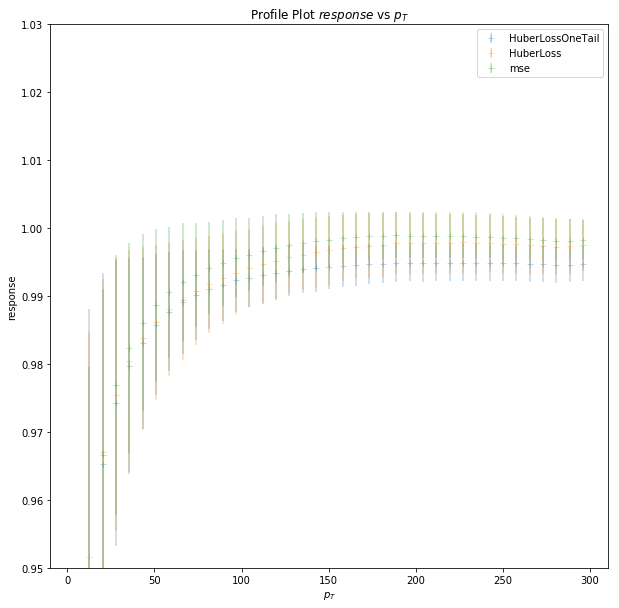

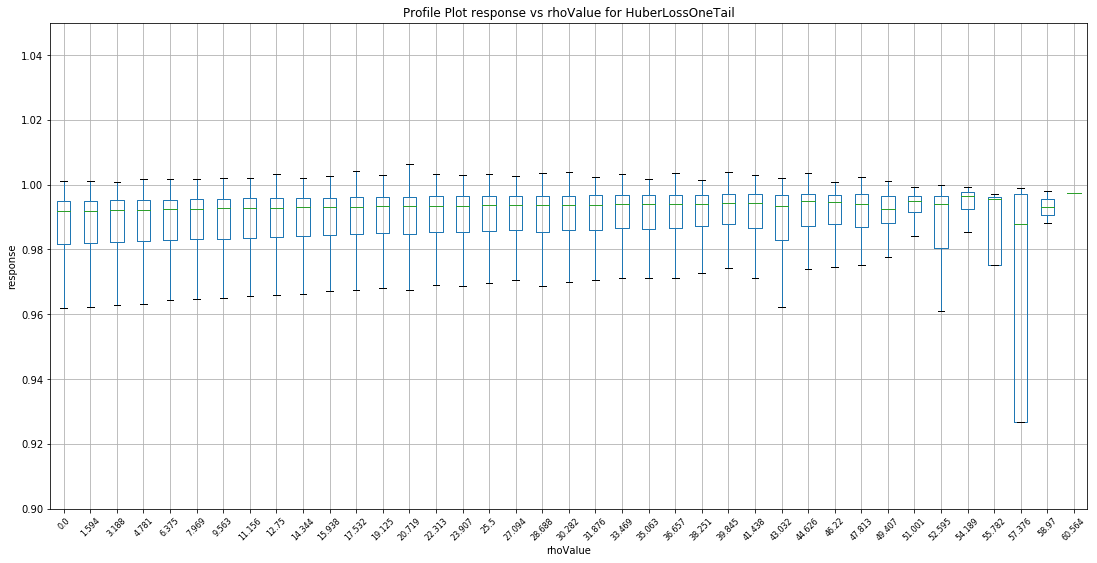

/work/kaechb/applied_EB/mse_EB_1_applied/applied_res_2019-05-02_EB.hd5
mse
(0.0, 62.157448)


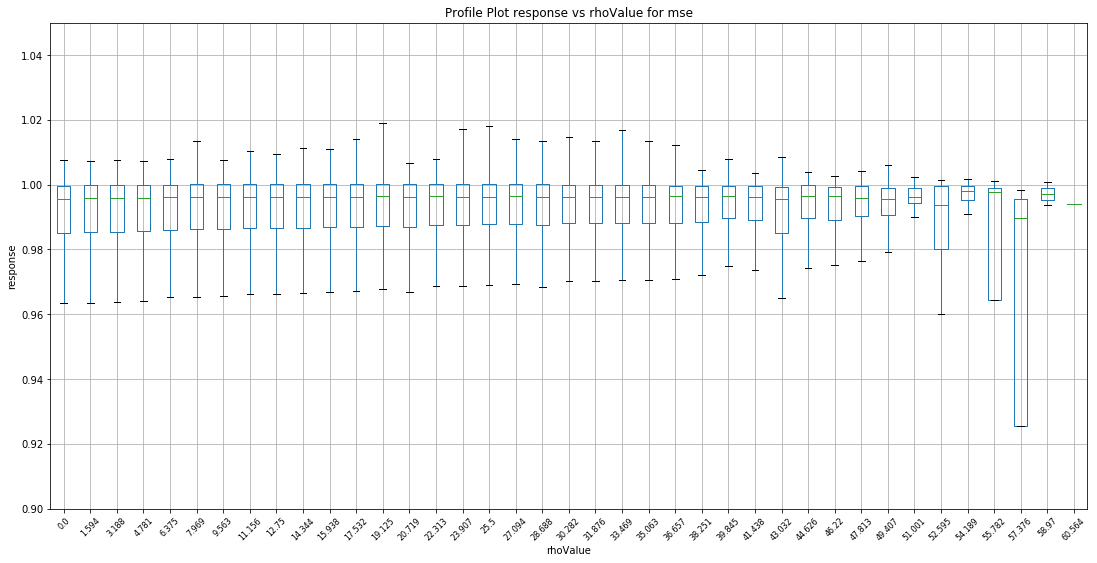

/work/kaechb/applied_EB/HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.0, 62.157448)


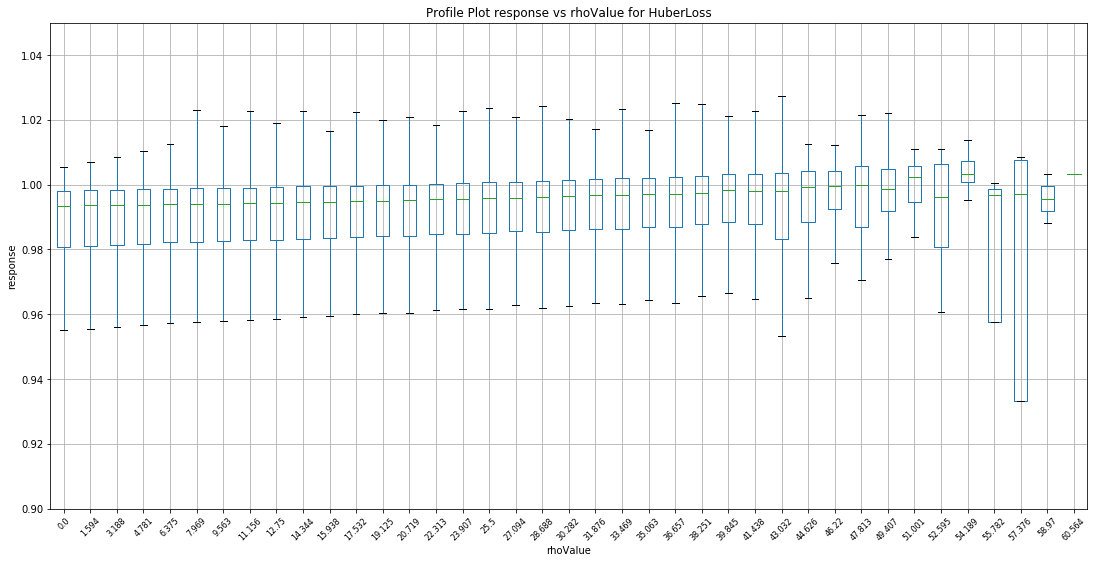

/work/kaechb/applied_EB/HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLossOneTail
(-1.4773221, 1.4773206)


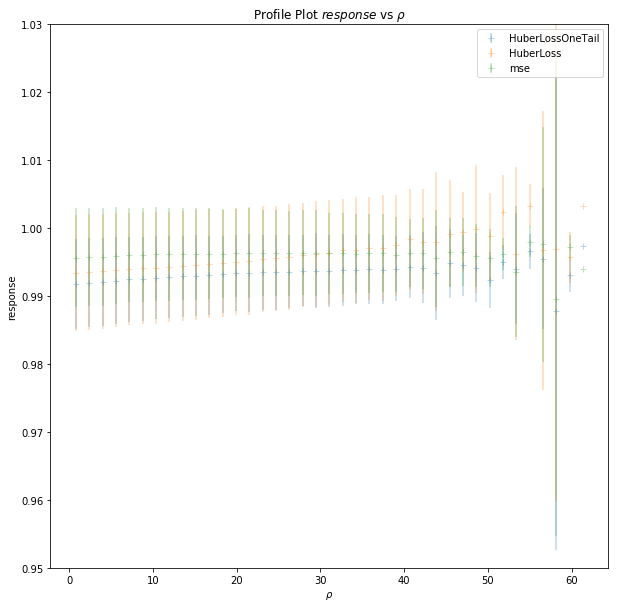

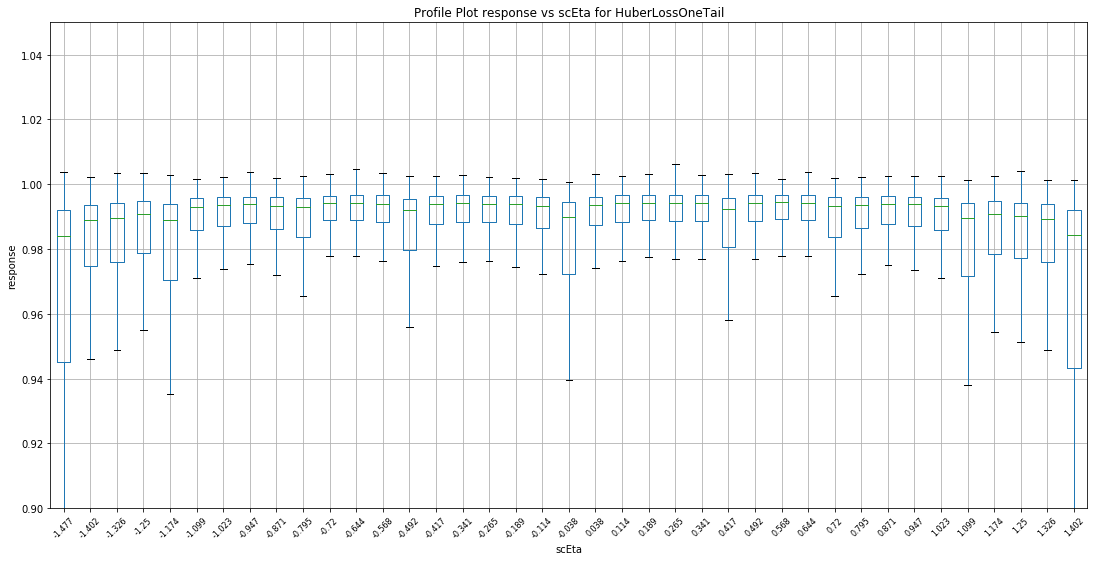

/work/kaechb/applied_EB/mse_EB_1_applied/applied_res_2019-05-02_EB.hd5
mse
(-1.4773221, 1.4773206)


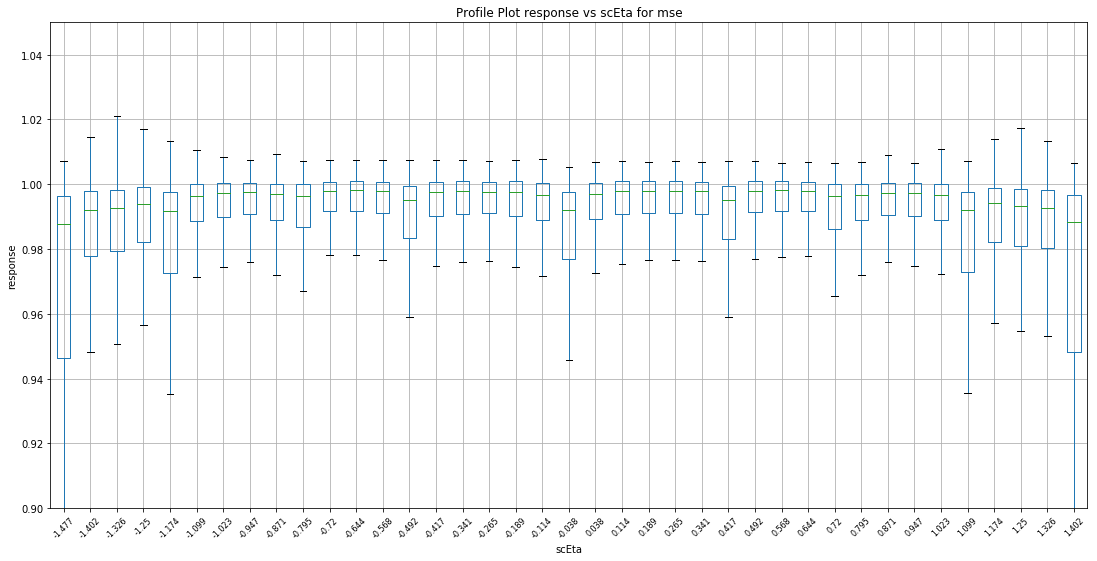

/work/kaechb/applied_EB/HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(-1.4773221, 1.4773206)


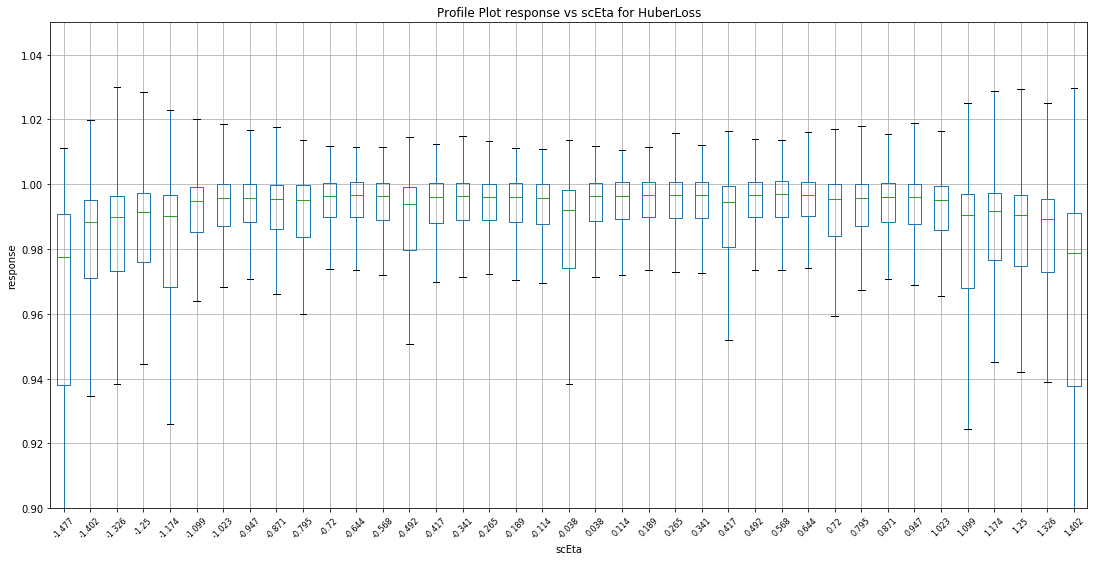

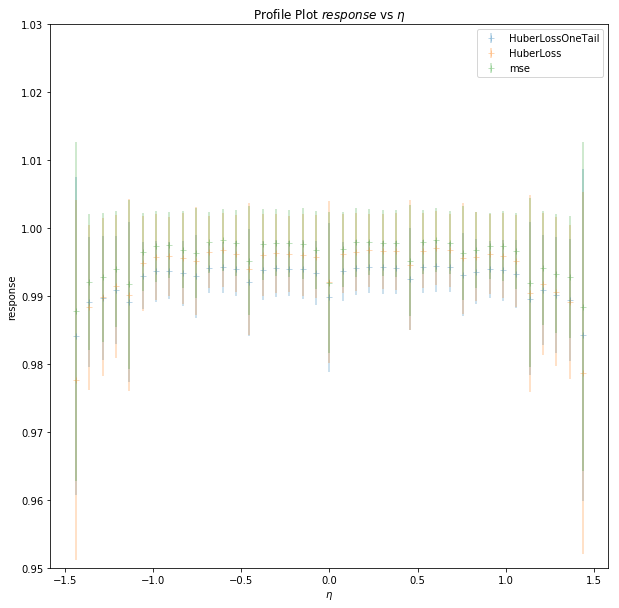

In [171]:
parent_dir="/work/kaechb/applied_EB/"

names=[]
for dire in os.listdir(parent_dir):
      
    #if  os.path.isdir("/work/kaechb/"+dire):
        for file in os.listdir(parent_dir+dire):#+"/"+dire
        #for file in os.listdir(sys.argv[1]):
            if file.find('.hd')!=-1 and file.find('applied')!=-1 :
               # input_dir.append(parent_dir)#+dire+"/"][0]
                
                names.append(dire+"/"+file)
print(names)
matplotlib.rcParams['figure.figsize'] = [10, 10]
inp_dir=parent_dir
bins_first=300
bins_gaussian_amount=15
bins_double_gaussian_amount=15
amountbins_column=15
debug_fit=0
debug_fit_gauss=0
amountbins=15

for column in ['pt','rhoValue','scEta']:#
    df_plot=pd.DataFrame()
    
    if column=='pt':
        xlab="$p_T$"
    if column=='rhoValue':
        xlab="$\\rho$"
    if column=='scEta':
        xlab="$\eta$"
    big_sigma=[]
    big_median=[]
    for k in range(0,len(names)):#len(names)
        if names[k].find("EB")>-1:
            tag="EB"

        if names[k].find("OneTail")>-1:
                end="HuberLossOneTail"
                delta=names[k].split("_")[1]
                if delta!='1':
                    continue

        elif names[k].find("Huber")>-1:
                end="HuberLoss"
        
                delta=names[k].split("_")[1]
                if delta!='1':
                    continue
        elif names[k].find("mse")>-1:
                end="mse"
                delta=""
        plot_out_dir="/work/kaechb/"+end+"_"+delta+"/" 

        if not os.path.exists(plot_out_dir):
            os.makedirs(plot_out_dir)
        inp_file=names[k]
        original_df=io.read_data('%s%s'%(inp_dir,inp_file),columns=None)
        print('%s%s'%(inp_dir,inp_file))
        print(end)

        df=original_df.copy()


        df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values)
        df.loc[:,'response_NN_'+end]=np.reciprocal(df.loc[:,'response_NN_'+end].values)
        bins=np.linspace(np.min(df[column].values),np.max(df[column].values),20)
        print(np.min(df[column].values),np.max(df[column].values))
#        df.loc[:,column[:2]]=df[abs(df[column[:2]]-df[column[:2]].mean())<3*df[column[:2]].std()][column[:2]] #outlier fuck up binning otherwise

        y='response_NN_'+end
        amountbins=40
        bins=np.linspace(df[column].min(),df[column].max(),amountbins)
                        
        fig = plt.figure(figsize=(18,9))
        ax = fig.add_subplot(111)
        df[column] = pd.cut(df[column].values, bins)
        bpmc = df.boxplot(column=y,by=column, return_type='both', ax=ax,showfliers=0)
        bins = np.round(bins,3)
        xtickNames = plt.setp(ax, xticklabels=bins)
        plt.title("Profile Plot response vs {} for {}".format(column,end))
        plt.setp(xtickNames, rotation=45, fontsize=8)
        plt.ylim(.9,1.05)
        plt.ylabel('response')    
        plt.suptitle('')
        plt.savefig("/work/kaechb/plots_nofit/boxplot_{}_with_{}".format(column,end))        
        plt.show()
        sigma=[]
        
        median=[]
        for line in bpmc.values[0].lines['boxes']:
            sigma.append((line.get_data()[1][-1]-line.get_data()[1][-2])/2)
            sigmar.append(line.get_data()[1][-2])
        for line in bpmc.values[0].lines['medians']:
            median.append(line.get_data()[1][0])
        df_plot["sigma"+end]=sigma
        df_plot[end]=median
        
        #plot_df[end+delta]=bpmc.median
        bins=(bins[1:]+bins[:-1])/2
        df_plot['x'+end]=bins
    fig,ax=plt.subplots()
    for loss in ['HuberLossOneTail','HuberLoss','mse']:
        ax.errorbar(df_plot['x'+loss],df_plot[loss],yerr=df_plot['sigma'+loss],label=loss,fmt='+',alpha=.3)
    plt.legend()
    ax.set_title('Profile Plot $response$ vs {}'.format(xlab))
    ax.set_xlabel(xlab)
    plt.ylim(.95,1.03)
    ax.set_ylabel('response')
    plt.savefig("/work/kaechb/plots_nofit/profile_{}_different_loss_functions_with_ylim".format(column))

### for different deltas

['HuberLossOneTail_2_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLossOneTail_5_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_5_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_2_EB_applied/applied_res_2019-05-02_EB.hd5', 'HuberLossOneTail_1_EB_applied/applied_res_2019-05-02_EB.hd5', 'mse_EB_1_applied/applied_res_2019-05-02_EB.hd5', 'HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5']
/work/kaechb/applied_EB/HuberLoss_5_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.9943522, 299.99942)


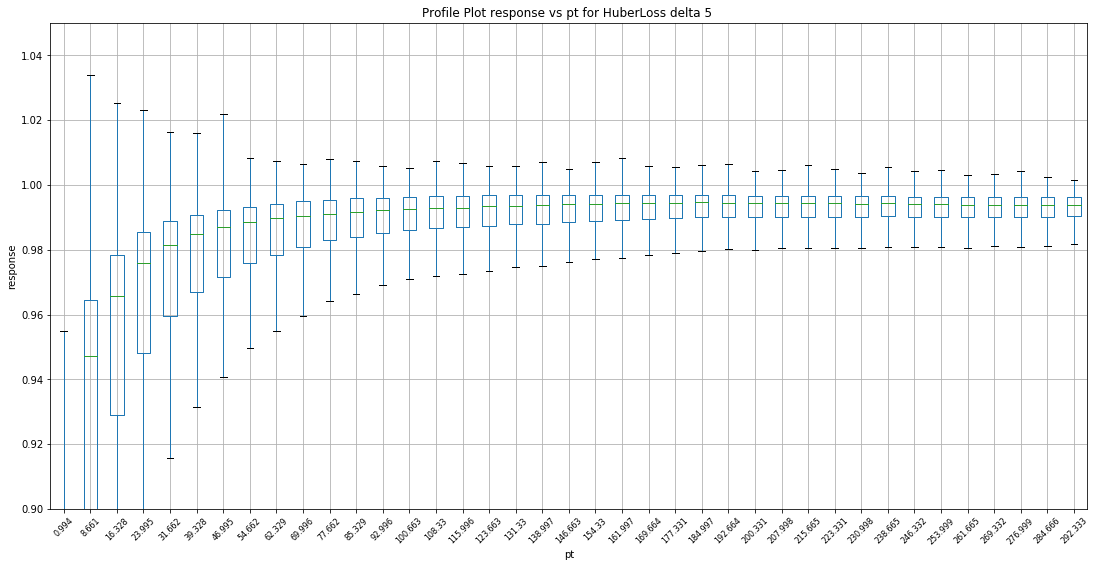

/work/kaechb/applied_EB/HuberLoss_2_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.9943522, 299.99942)


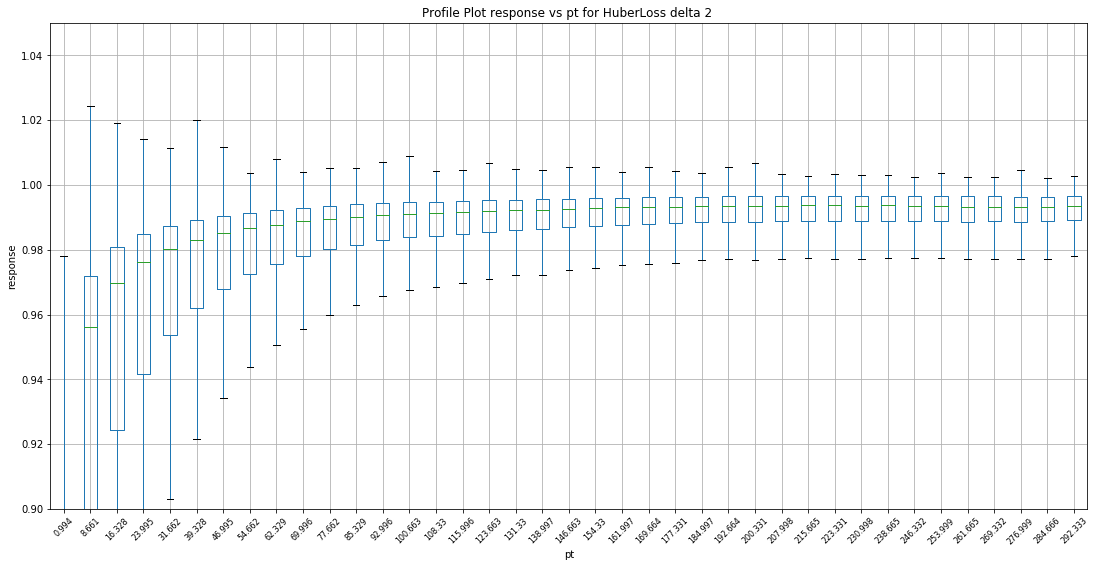

/work/kaechb/applied_EB/HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.9943522, 299.99942)


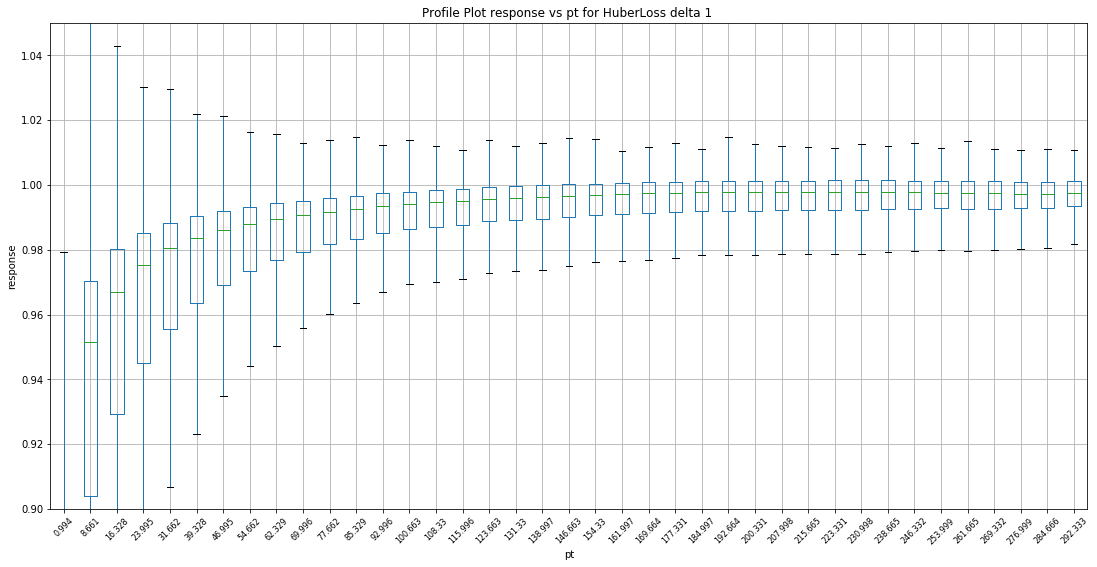

/work/kaechb/applied_EB/HuberLoss_5_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.0, 62.157448)


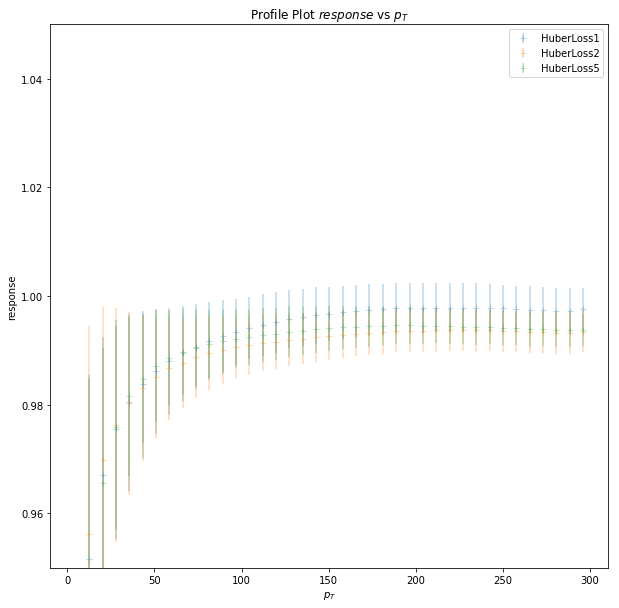

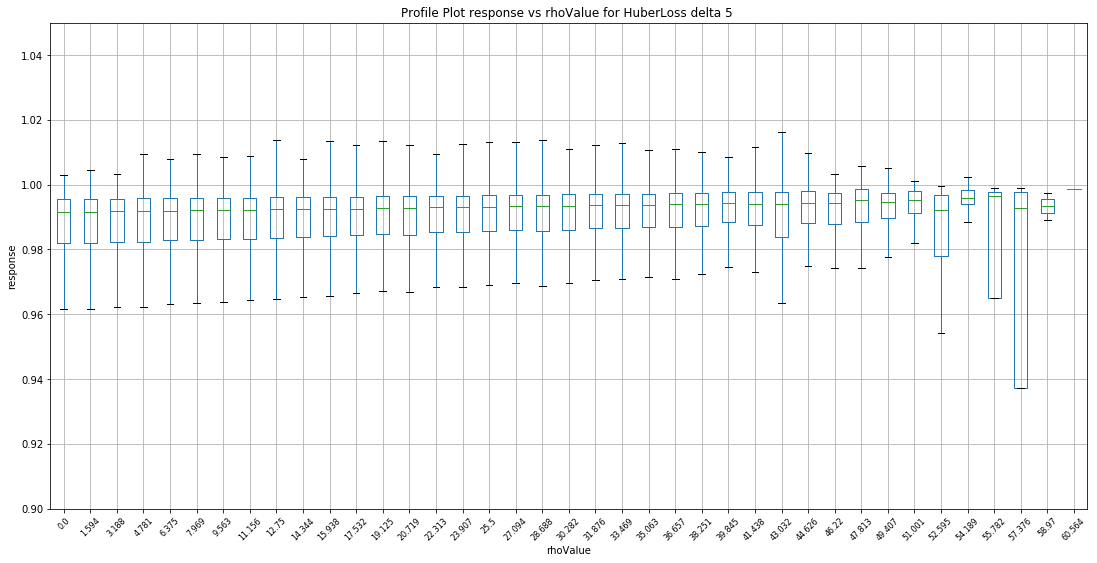

/work/kaechb/applied_EB/HuberLoss_2_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.0, 62.157448)


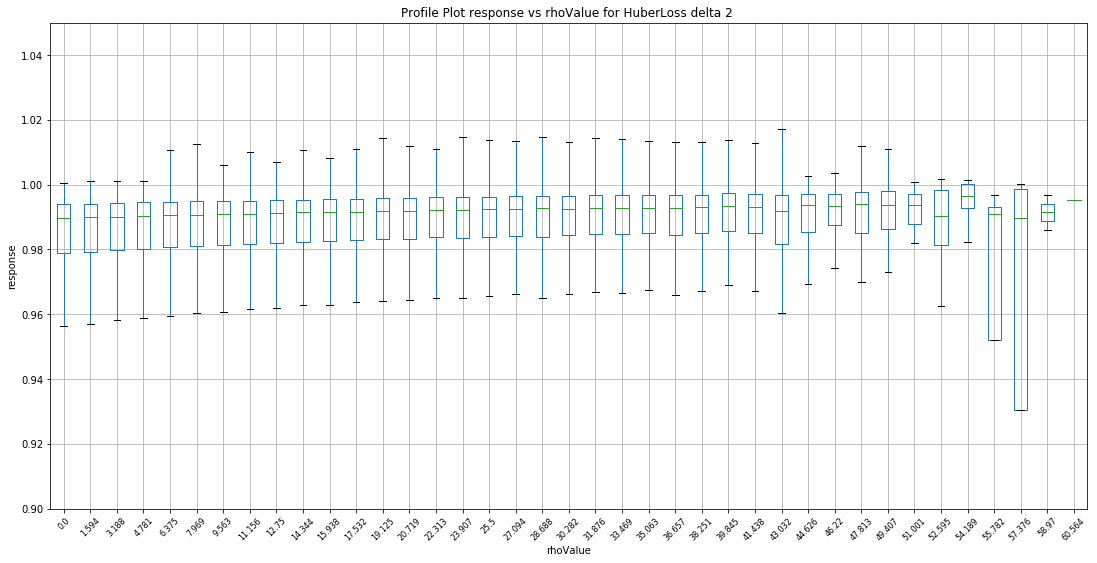

/work/kaechb/applied_EB/HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(0.0, 62.157448)


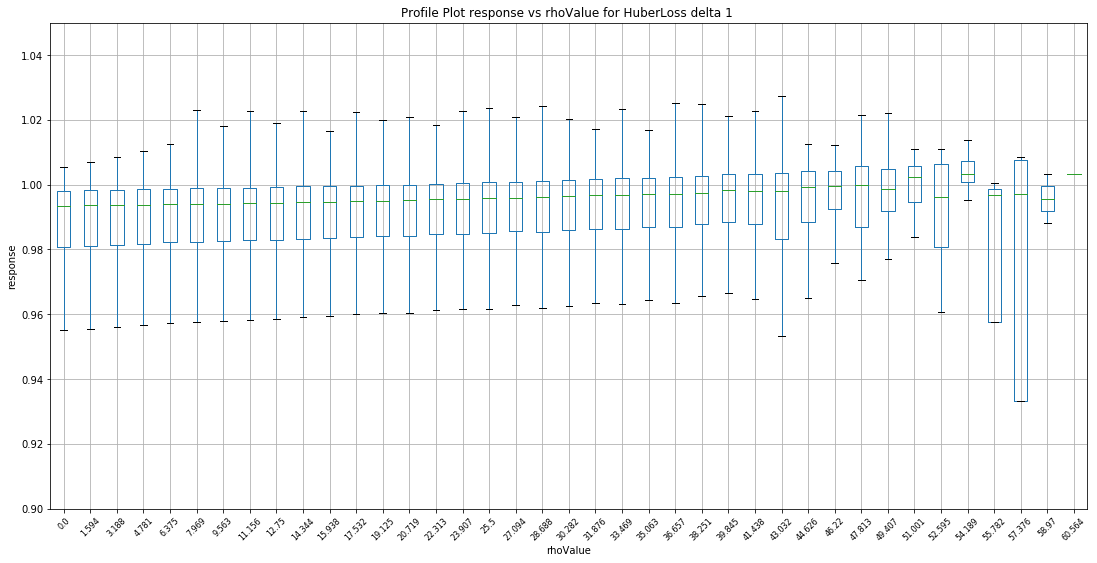

/work/kaechb/applied_EB/HuberLoss_5_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(-1.4773221, 1.4773206)


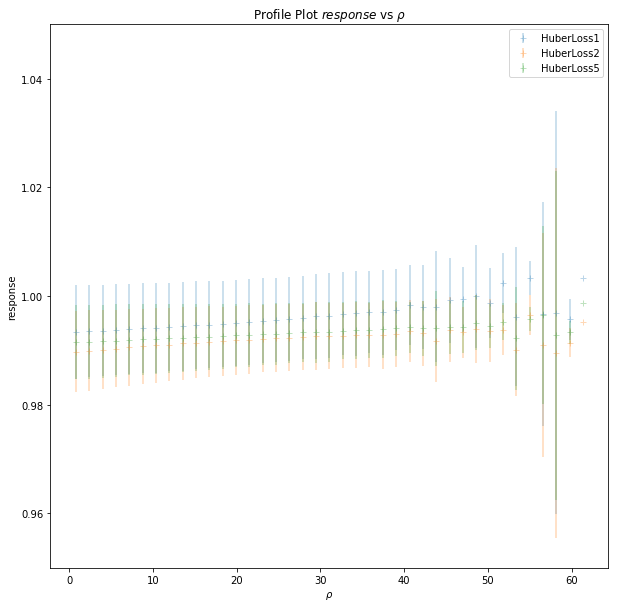

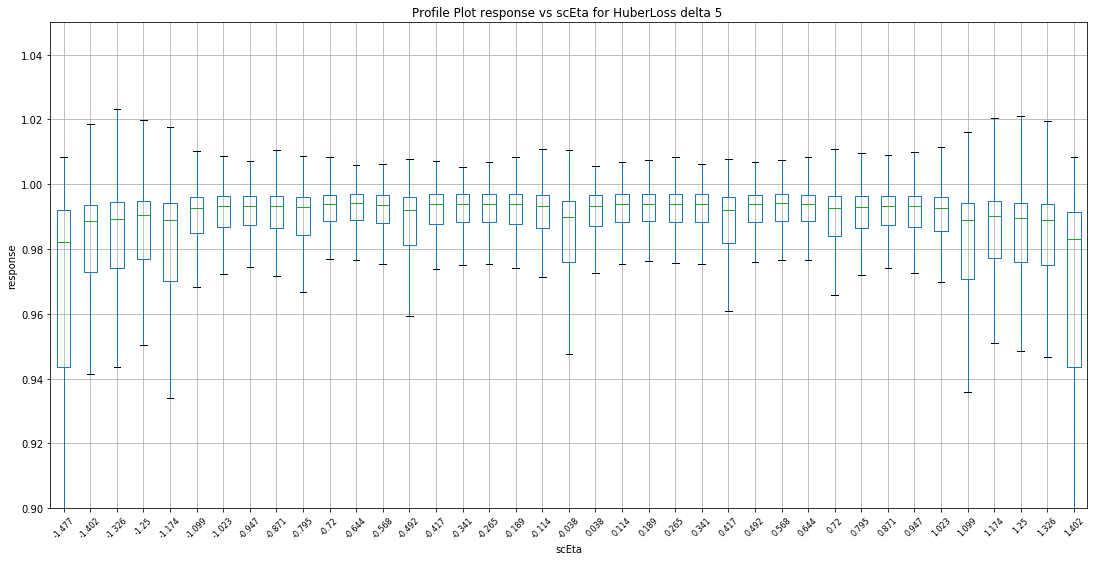

/work/kaechb/applied_EB/HuberLoss_2_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(-1.4773221, 1.4773206)


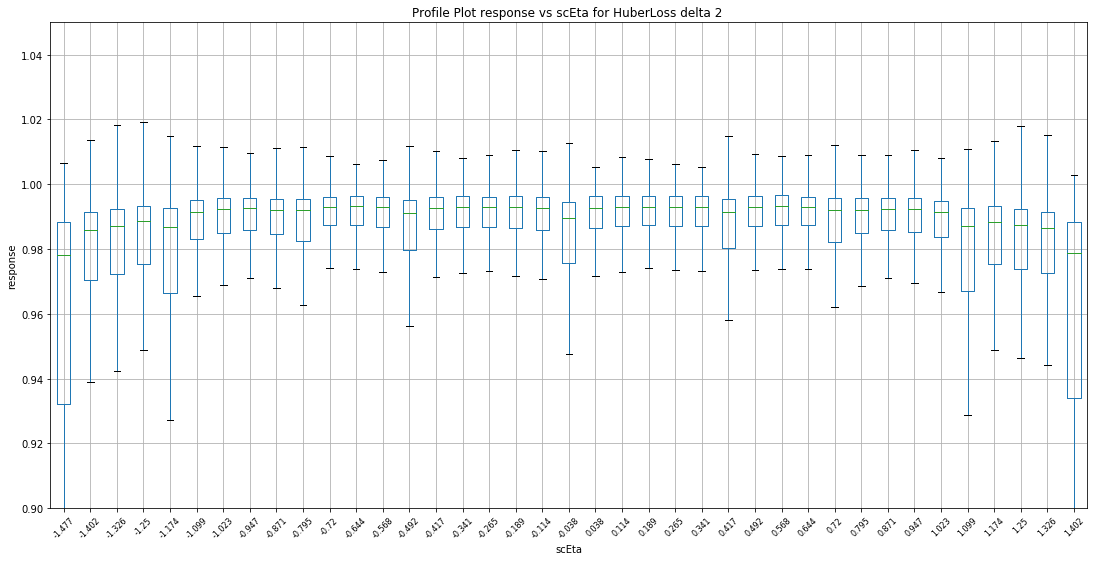

/work/kaechb/applied_EB/HuberLoss_1_EB_applied/applied_res_2019-05-02_EB.hd5
HuberLoss
(-1.4773221, 1.4773206)


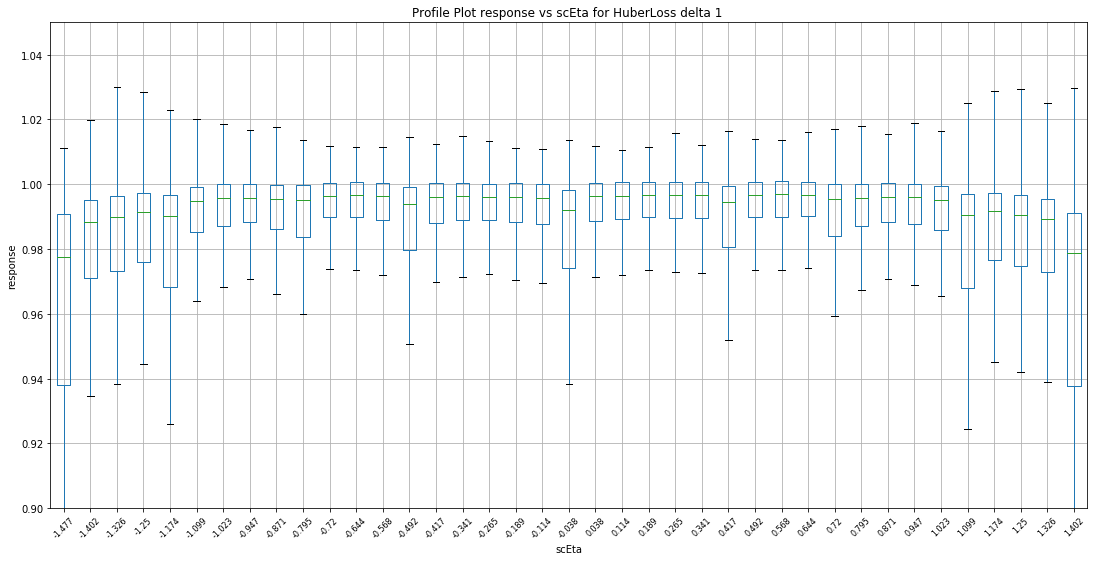

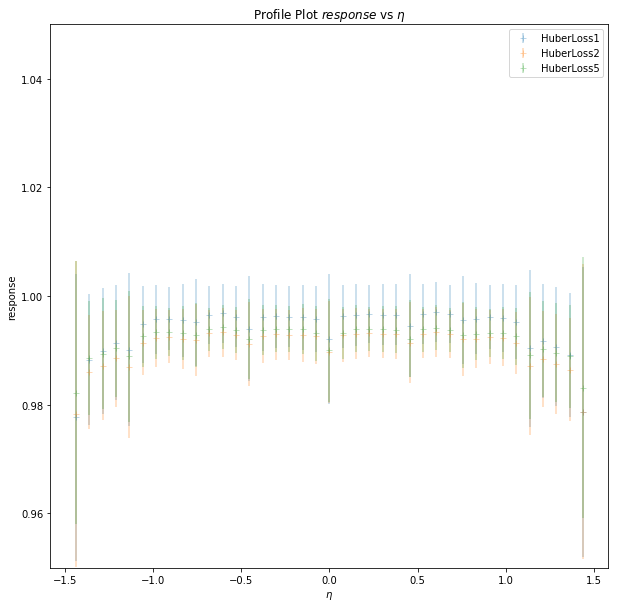

In [172]:
parent_dir="/work/kaechb/applied_EB/"

names=[]
for dire in os.listdir(parent_dir):
      
    #if  os.path.isdir("/work/kaechb/"+dire):
        for file in os.listdir(parent_dir+dire):#+"/"+dire
        #for file in os.listdir(sys.argv[1]):
            if file.find('.hd')!=-1 and file.find('applied')!=-1 :
               # input_dir.append(parent_dir)#+dire+"/"][0]
                
                names.append(dire+"/"+file)
print(names)
matplotlib.rcParams['figure.figsize'] = [10, 10]
inp_dir=parent_dir
bins_first=300
bins_gaussian_amount=15
bins_double_gaussian_amount=15
amountbins_column=15
debug_fit=0
debug_fit_gauss=0
amountbins=15

for column in ['pt','rhoValue','scEta']:#
    df_plot=pd.DataFrame()
    
    if column=='pt':
        xlab="$p_T$"
    if column=='rhoValue':
        xlab="$\\rho$"
    if column=='scEta':
        xlab="$\eta$"
    big_sigma=[]
    big_median=[]
    for k in range(0,len(names)):#len(names)
        if names[k].find("EB")>-1:
            tag="EB"

        if names[k].find("OneTail")>-1:
            continue
            
            end="HuberLossOneTail"
            delta=names[k].split("_")[1]

        elif names[k].find("Huber")>-1:
            end="HuberLoss"

            delta=names[k].split("_")[1]
        else:
            continue
        plot_out_dir="/work/kaechb/"+end+"_"+delta+"/" 

        if not os.path.exists(plot_out_dir):
            os.makedirs(plot_out_dir)
        inp_file=names[k]
        original_df=io.read_data('%s%s'%(inp_dir,inp_file),columns=None)
        print('%s%s'%(inp_dir,inp_file))
        print(end)

        df=original_df.copy()


        df.loc[:,'response']=np.reciprocal(df.loc[:,'response'].values)
        df.loc[:,'response_NN_'+end]=np.reciprocal(df.loc[:,'response_NN_'+end].values)
        bins=np.linspace(np.min(df[column].values),np.max(df[column].values),20)
        print(np.min(df[column].values),np.max(df[column].values))
#        df.loc[:,column[:2]]=df[abs(df[column[:2]]-df[column[:2]].mean())<3*df[column[:2]].std()][column[:2]] #outlier fuck up binning otherwise

        y='response_NN_'+end
        amountbins=40
        bins=np.linspace(df[column].min(),df[column].max(),amountbins)
                        
        fig = plt.figure(figsize=(18,9))
        ax = fig.add_subplot(111)
        df[column] = pd.cut(df[column].values, bins)
        bpmc = df.boxplot(column=y,by=column, return_type='both', ax=ax,showfliers=0)
        bins = np.round(bins,3)
        xtickNames = plt.setp(ax, xticklabels=bins)
        plt.title("Profile Plot response vs {} for {} delta {} ".format(column,end,delta))
        plt.setp(xtickNames, rotation=45, fontsize=8)
        plt.ylim(.9,1.05)
        plt.ylabel('response')    
        plt.suptitle('')
        plt.savefig("/work/kaechb/plots_nofit/boxplot_{}_{}_delta_{}".format(column,end,delta))        
        plt.show()
        sigma=[]
        
        median=[]
        for line in bpmc.values[0].lines['boxes']:
            sigma.append((line.get_data()[1][-1]-line.get_data()[1][-2])/2)
            sigmar.append(line.get_data()[1][-2])
        for line in bpmc.values[0].lines['medians']:
            median.append(line.get_data()[1][0])
        df_plot["sigma"+end+delta]=sigma
        df_plot[end+delta]=median
        
        #plot_df[end+delta]=bpmc.median
        bins=(bins[1:]+bins[:-1])/2
        df_plot['x'+end+delta]=bins
    fig,ax=plt.subplots()
    for loss in [end+'1',end+'2',end+'5']:
        ax.errorbar(df_plot['x'+loss],df_plot[loss],yerr=df_plot['sigma'+loss],label=loss,fmt='+',alpha=.3)
    plt.legend()
    plt.ylim(.95,1.05)
    ax.set_title('Profile Plot $response$ vs {}'.format(xlab))
    ax.set_xlabel(xlab)
    ax.set_ylabel('response')
    plt.savefig("/work/kaechb/plots_nofit/profile_{}_different_deltas_for_{}".format(column,end))

### FOR MAURO 